<center> <h2> Unlock Your Financial Freedom with Stock Market Predictions Using Backtesing, ARIMA and GRU! </h2> </center>

   In this notebook we would be trying to predict if the stock price of Google will increase or decrease based on the historical idea. We would be using something known as backtesting and hyperparameter tuning to increase the precision score of our  <b> XGBoost Classifier. </b>
   
   Next we would have  <b>ARIMA model</b> where we learn how to find the p,d anq q values and makes the predictions on training and test set. Next up, we would have a  <b>deep learning model </b> named GRU for making predictions on the stock data. There are some important further reading links in the bottom as well so make sure to check those out as well.
   
<p align='justify'>
Google was <i> founded on September 4, 1998</i>, by <b>Larry Page</b> and <b>Sergey Brin</b> while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of the stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. 
</p>  

<center> <img src="https://media0.giphy.com/media/PCya6Lr0RYHM4/giphy.gif?cid=790b7611615c1b753c157b10bf33e47adc7a782fc57f2221&rid=giphy.gif&ct=g"> </center>


Google is <b> Alphabet's largest subsidiary </b>  and is a holding company for Alphabet's Internet properties and interests. <b> Sundar Pichai </b>  was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Mr. Pichai also became the CEO of Alphabet.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Importing Libraries
    
</h2>
</div>
    
</center>

In [1]:
#Installing yfinance library
!pip install yfinance --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.


In [2]:
#all the imports and the dependencies required for the noteboo

import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Reading the data from yfinance library
    
</h2>
</div>
    
</center>

Yahoo Finance uses `pandas` library and automatically puts the entire data into a nice looking dataframe. We are using the `max` period to fetch all of the data of **Google** Stock prices.

In [3]:
# This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
data = yf.Ticker("GOOGL")
#create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
data_hist = data.history(period="max")
# prints the data_hist variable
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-17 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,32602400,0.0,0.0
2023-01-18 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,29116700,0.0,0.0
2023-01-19 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003,37000400,0.0,0.0


In [4]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 4639 rows and 7 columns


The below chart shows us how the prices have fluctuated over the months, years, and trading days.

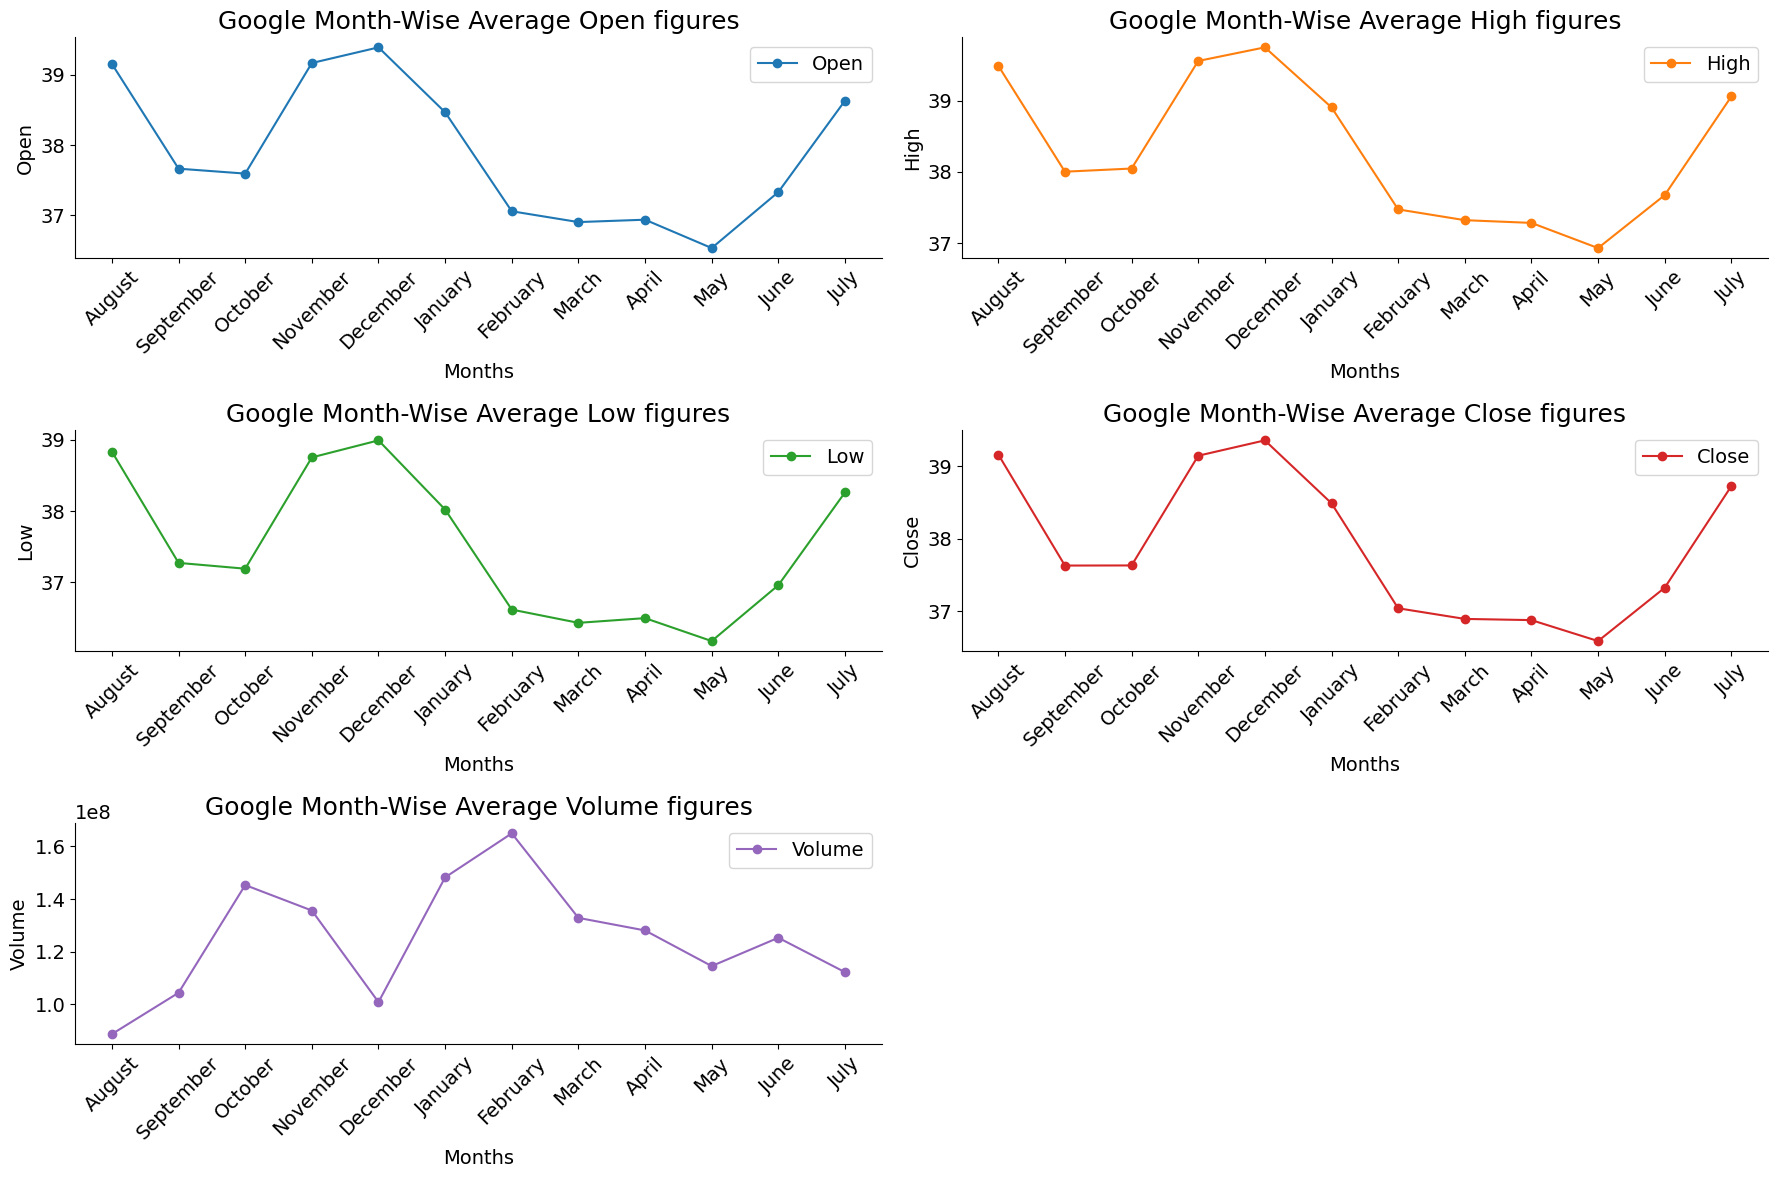

In [5]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

#Loop through the each column in the dataframe to generate a subplot
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    #Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot counter
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

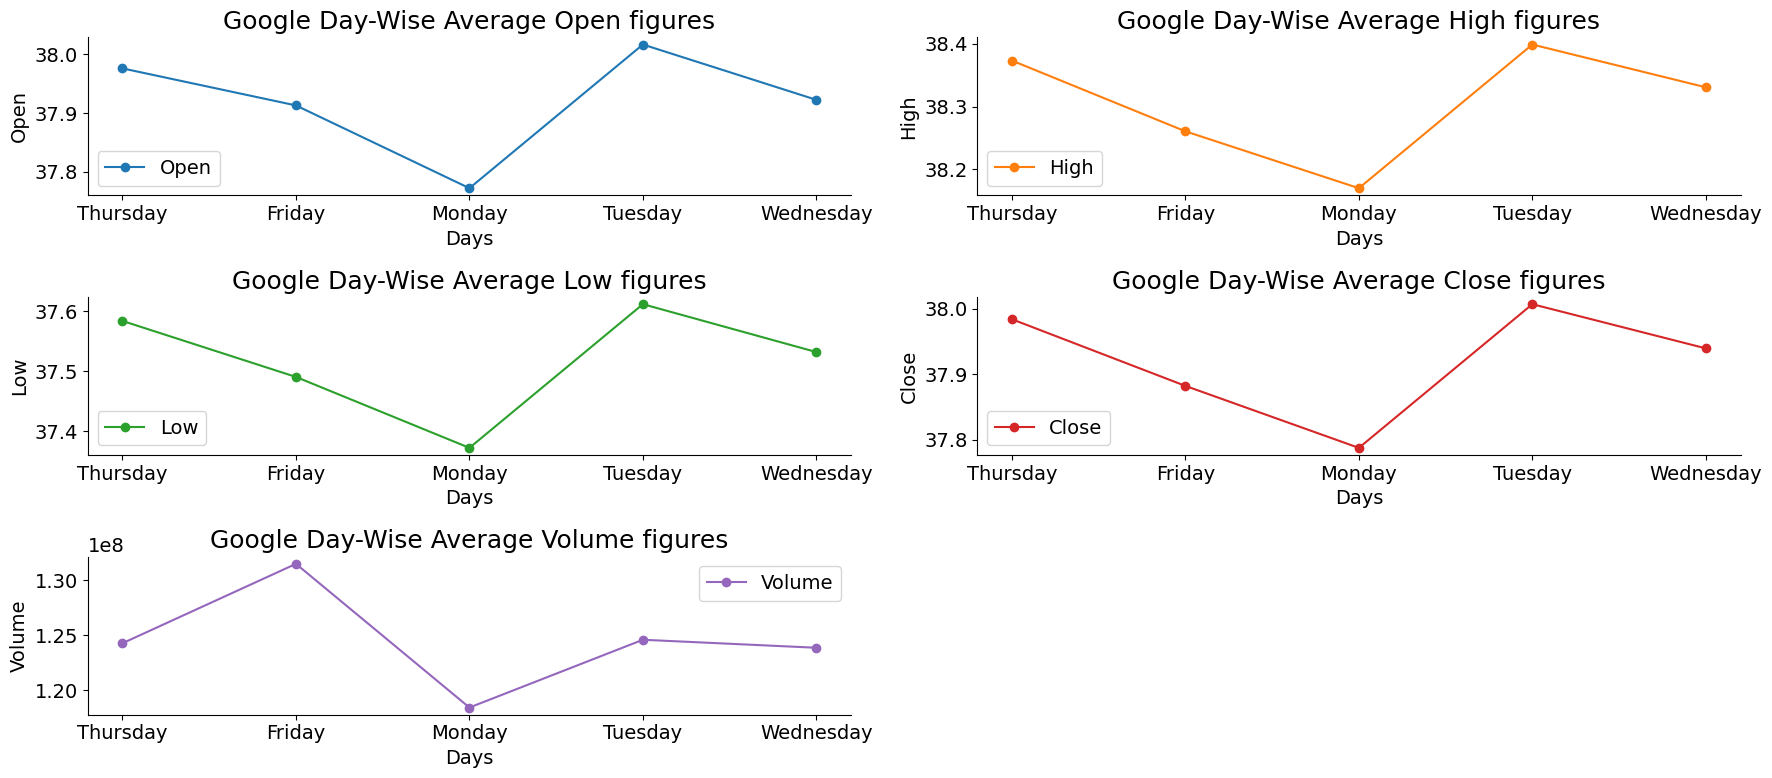

In [6]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,8))

for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

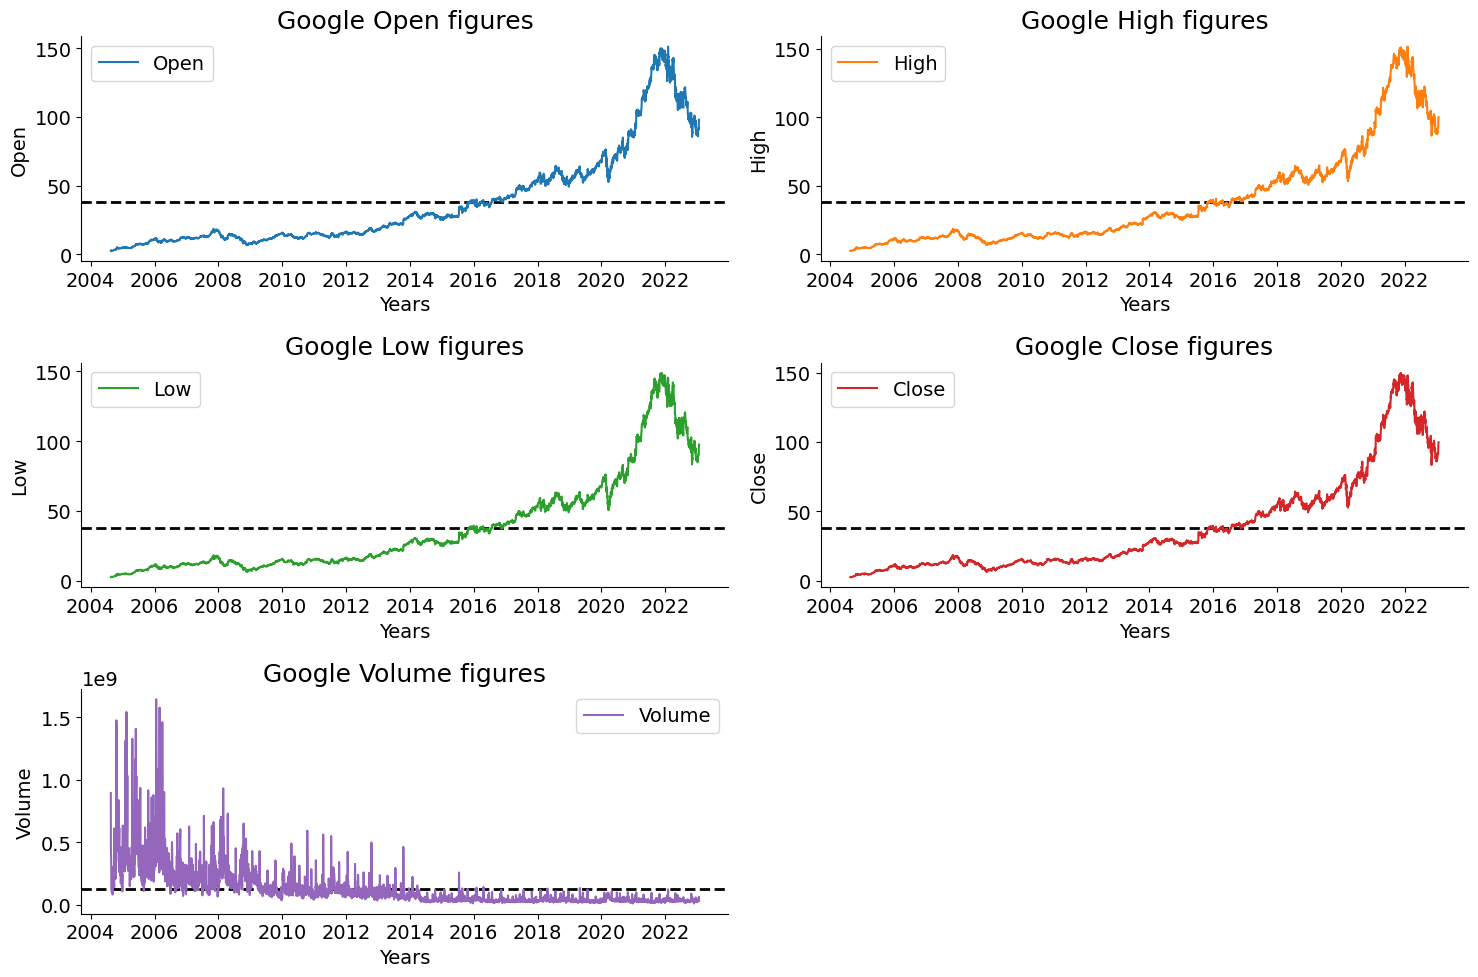

In [7]:
# This code plots open high low and close columns in a dataframe, data_hist.

# The number of rows, columns, and the subplot counter are initialized. 
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(15,10))

for i in range(len(data_hist.columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(data_hist[data_hist.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(data_hist.columns[i])
    #Adding Legend
    plt.legend([data_hist.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

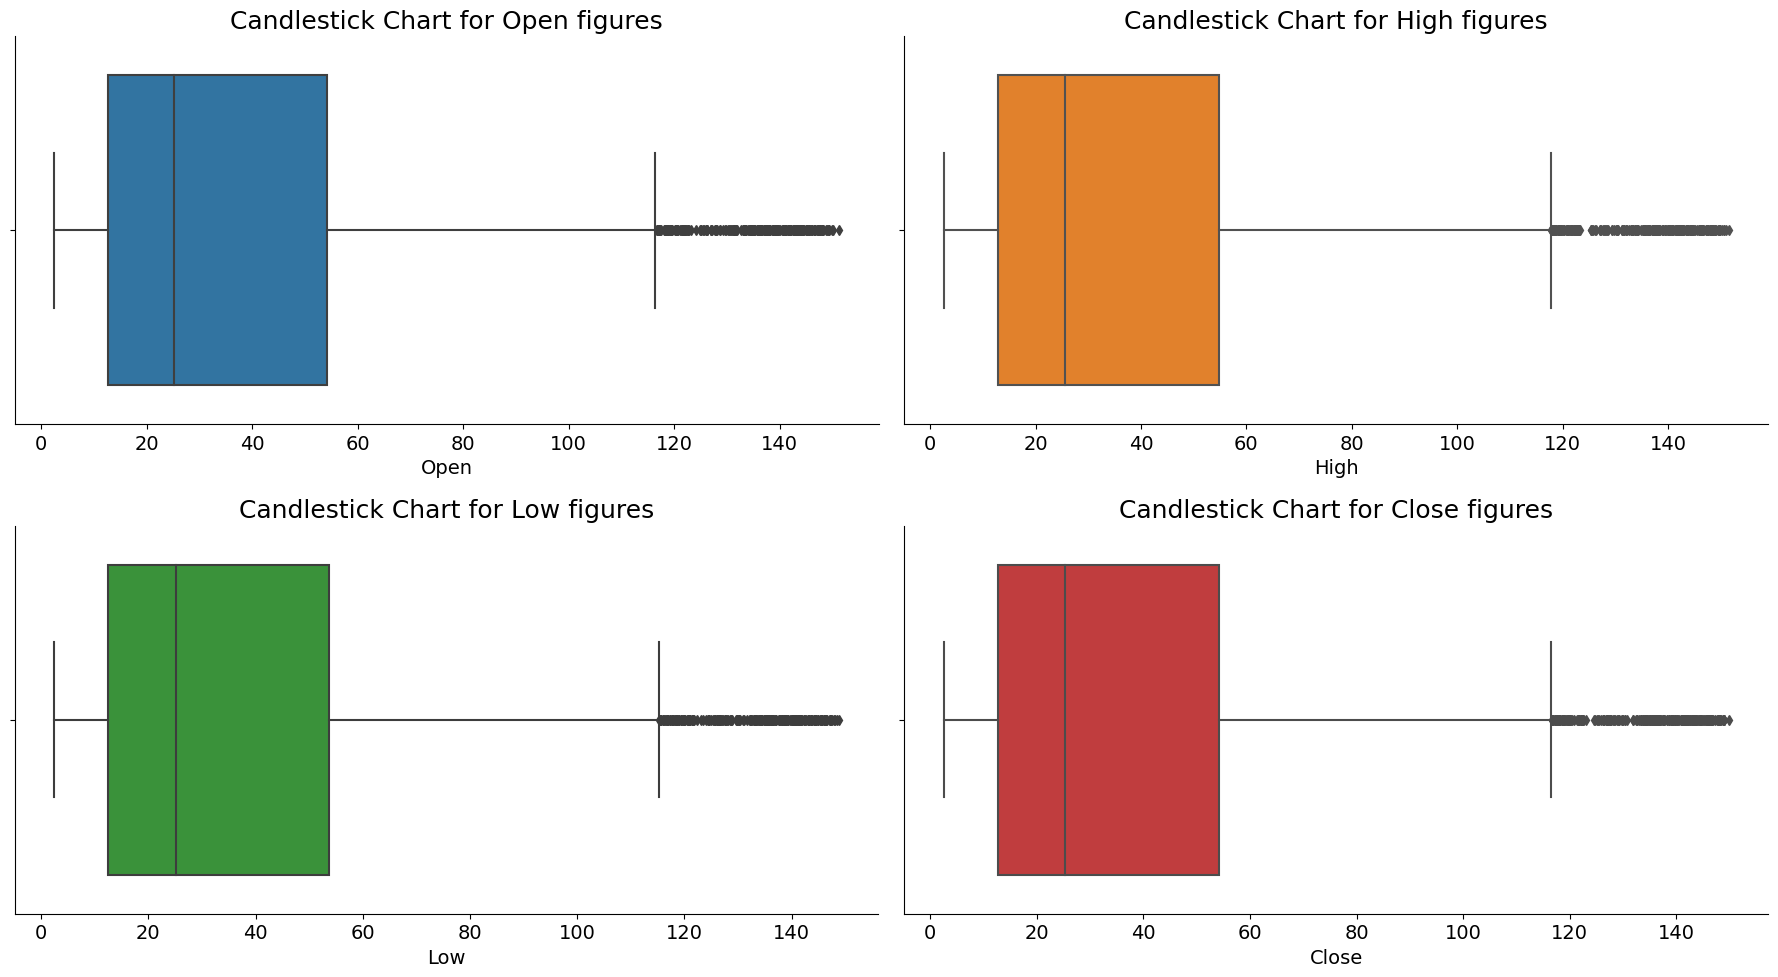

In [8]:
# This code plots boxplots of various columns in a dataframe, data_hist.

colors = plt.rcParams["axes.prop_cycle"]()

# The number of rows, columns, and the subplot counter are initialized. 
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized  
fig = plt.figure(figsize=(18,10))

#loop is used to iterate over the columns of dataframe. 
for i in range(len(data_hist.columns[:-3])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #For each column, a boxplot is plotted and labels and titles are set accordingly. 
    sns.boxplot(data_hist[data_hist.columns[i]], color= color )
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #X Axis label is added
    plt.xlabel(data_hist.columns[i])
    #title to the plot is added
    plt.title(f'Candlestick Chart for {data_hist.columns[i]} figures', fontsize=18)
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

In [9]:
def candlestick(t, o, h, l, c):
    """
    # This function takes in five variables, t (time), o (open price), h (high price), 
    l (low price), c (close price) to plot a candlestick chart. 
    """
    
    # Sets the figure size.
    plt.figure(figsize=(22,5))
    # Sets the color based on whether the close price is greater than the open price.
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    # Plots the absolute difference between open and close prices, from the minimum of the two.
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color)
    # Plots the difference between the high and low price, from the low price.
    plt.bar(x=t, height=h-l, bottom=l, color=color)
    # Hides the Plot grid.
    plt.grid(visible=False)
    # Sets the title of the chart.
    plt.title('Candlestick Chart')

In [10]:
# set start and end dates for the plot
today = date.today()
start = '2020-12-31'
end = today

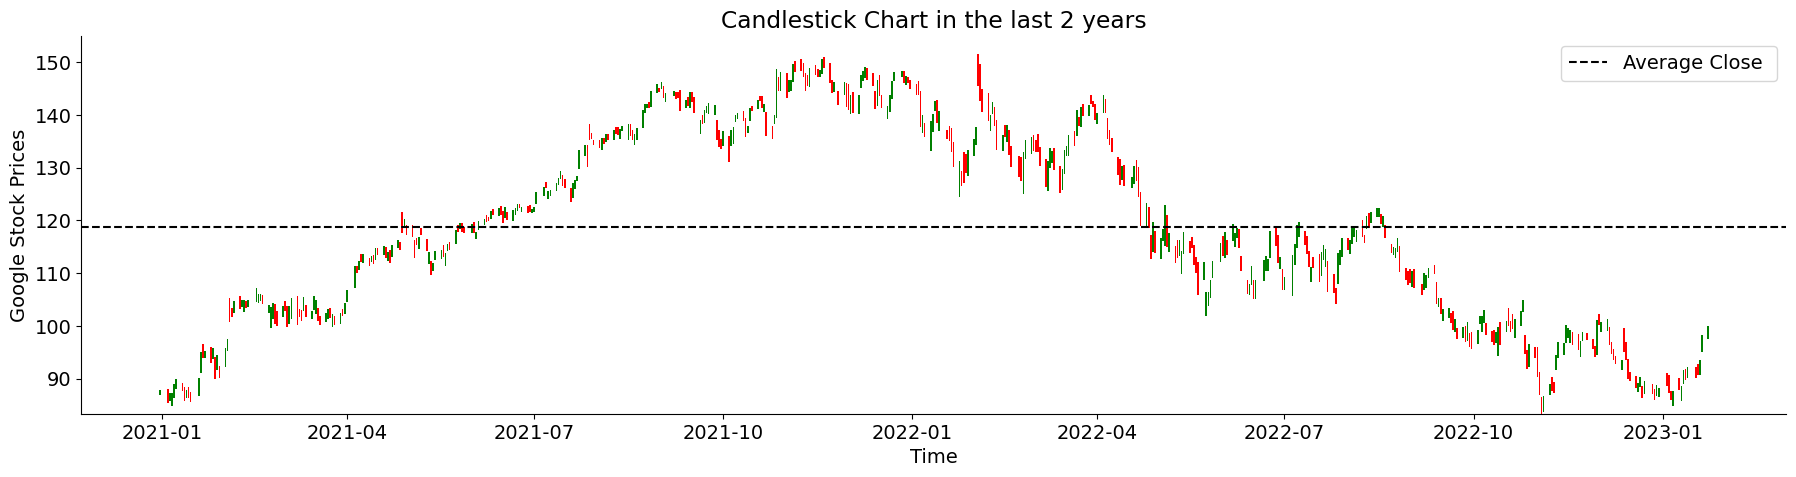

In [11]:
#passing in the index with Open, High, Low And Close Values to the function we created above
candlestick(
    data_hist[start:end].index,
    data_hist[start:end]["Open"],
    data_hist[start:end]["High"],
    data_hist[start:end]["Low"],
    data_hist[start:end]["Close"]
)
plt.axhline(data_hist[start:end]["Close"].mean(), linestyle="--", color='black')
# remove chart spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#adding x axis label
plt.xlabel('Time')
#adding y axis label
plt.ylabel('Google Stock Prices')
#Adding the title to the chart
plt.title('Candlestick Chart in the last 2 years')
#Adding the legend for the average line
plt.legend(['Average Close '])
#showing the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Adding Target Values
    
</h2>
</div>
    
</center>

We are adding the target column where the column will say 0 or 1. 0 meaning the price went down and 1 would mean the price went up.

We will be using the rolling method of Pandas library. Rolling method will look at the number of rows in the data (in our case 2) and then what we are saying is return 1st row if the 2nd row is higher else return 0 and this gives us our target.

In [12]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Date
2004-08-19 00:00:00-04:00    NaN
2004-08-20 00:00:00-04:00    1.0
2004-08-23 00:00:00-04:00    1.0
2004-08-24 00:00:00-04:00    0.0
2004-08-25 00:00:00-04:00    1.0
                            ... 
2023-01-17 00:00:00-05:00    0.0
2023-01-18 00:00:00-05:00    0.0
2023-01-19 00:00:00-05:00    1.0
2023-01-20 00:00:00-05:00    1.0
2023-01-23 00:00:00-05:00    1.0
Name: Close, Length: 4639, dtype: float64

In [13]:
# This code adds a new column called "Target" to the data_hist dataframe. 
#The values in the target column are determined by comparing the current value in the "Close" column with the previous value. 
#If the current value is larger than the previous value, the target column value will be set to True. 
#If the current value is smaller than the previous value, the target column value will be set to False.

data_hist["Target"] = data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Now that we have our target, <i >we would shift our data by 1 row</i>. 

- What that means is data of 19-08-2004 will shift to the next available data which is 20-08-2004. This means we would, in real scenario, be using yesterday's data to predict tomorrow. 

- However if we were not to do that what we would be doing is using today's data to predict today's target which is something that is likely to render terrible results in real life situations.

In [14]:
#Copy the data_hist dataframe and store it in a new dataframe named df
df = data_hist.copy()

#Shift the data in the dataframe by one row
df = df.shift(1)

#Display the first five rows of the shifted df
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-19 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924.0,0.0,0.0,NaN
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.0,0.0


Originally we had `Open`, `High`, `Low`, `Close`, `Volume`, `Dividends`, `Stock Splits` but we are only using `Open`, `High`, `Low`, `Close`, `Volume`, as our predictors for the model. Later on we would add more predictors that will help our model perform better.

In [15]:
#Create a list of predictors 
predictors = ["Close", "Volume", "Open", "High", "Low"]

#Select the columns in the data for the predictors and the target
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

#Print the first five rows of the data
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0


Our classes have a bit of a class imbalance which we will deal with later on using the `RandomOverSampler` from the `imblearn` library and that's going to ensure the occurence of both the classes is equal which will help in a way that the model will not be biased towards a certain class.

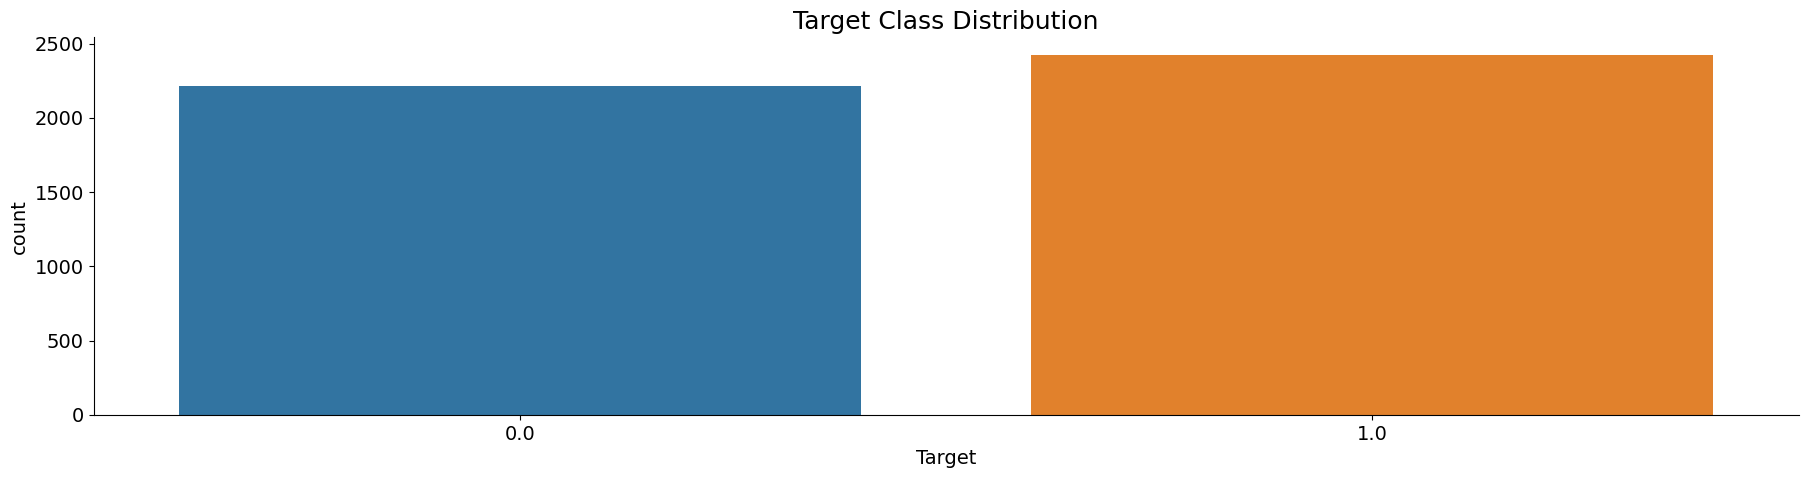

In [16]:
#creates a countplot of the Target column from the dataframe df
sns.countplot(df['Target'])

#removes the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#labels the x-axis of the plot
plt.xlabel('Target')

#adds a title to the plot
plt.title('Target Class Distribution', fontsize=18)

#shows the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Spliting and Resampling Data, Training Model
    
</h2>
</div>
    
</center>

As we saw earlier that there is a slight imbalance in our classes, we will go ahead and resample the data. We are initializing the `RandomOverSampler` object and then resampling our inputs and the targets.

In [17]:
# Initiate a RandomOverSampler object and assigns it to the variable 'ros'.
ros = RandomOverSampler(random_state=0)

# Assigns the feature data to the variable 'X'.
X = df[["Open", "High", "Low", "Close", "Volume"]]

# Assigns the target data to the variable 'y'.
y = df['Target'].values

# Apply RandomOverSampler to the feature and target data then assigns the data to the variables 'X_resampled' & 'y_resampled'.
X_resampled, y_resampled  = ros.fit_resample(X,y)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Countplot of Resampled Classes
    
</h2>
</div>
    
</center>

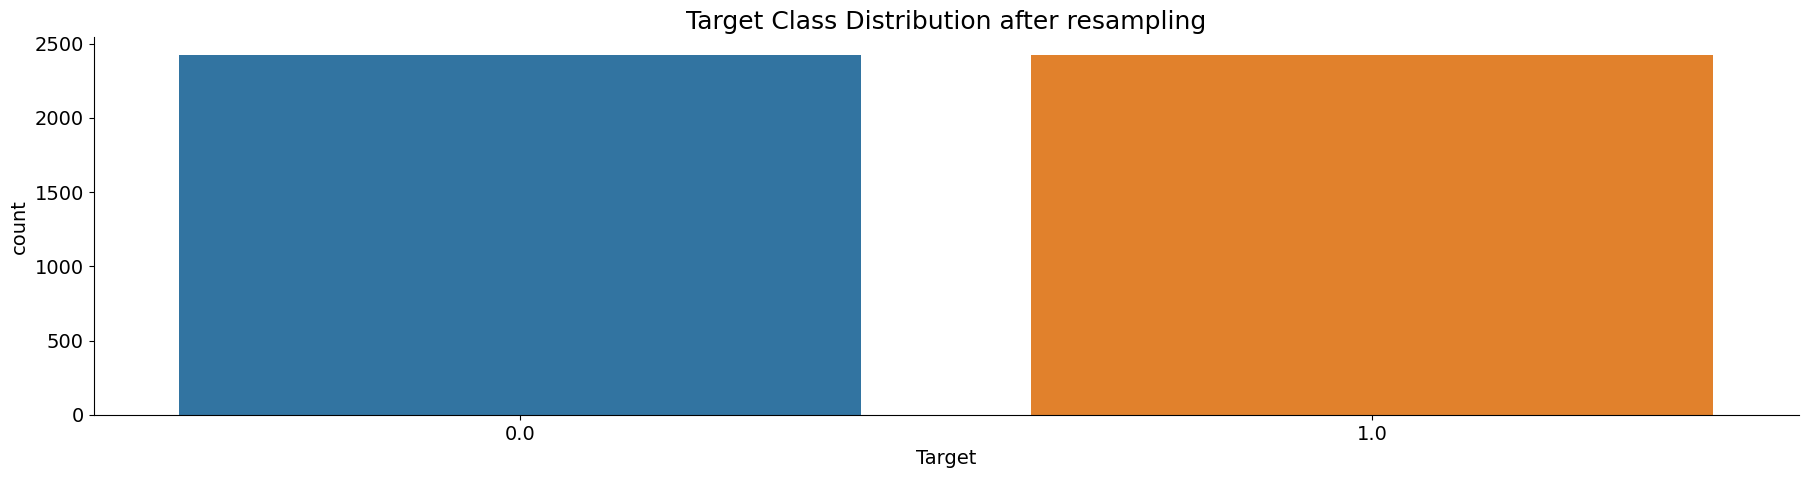

In [18]:
#plotting a countplot of the resampled target values
sns.countplot(y_resampled)
#hiding the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#labeling the x-axis
plt.xlabel('Target')
#adding a title
plt.title('Target Class Distribution after resampling', fontsize=18)
#displaying the plot
plt.show()

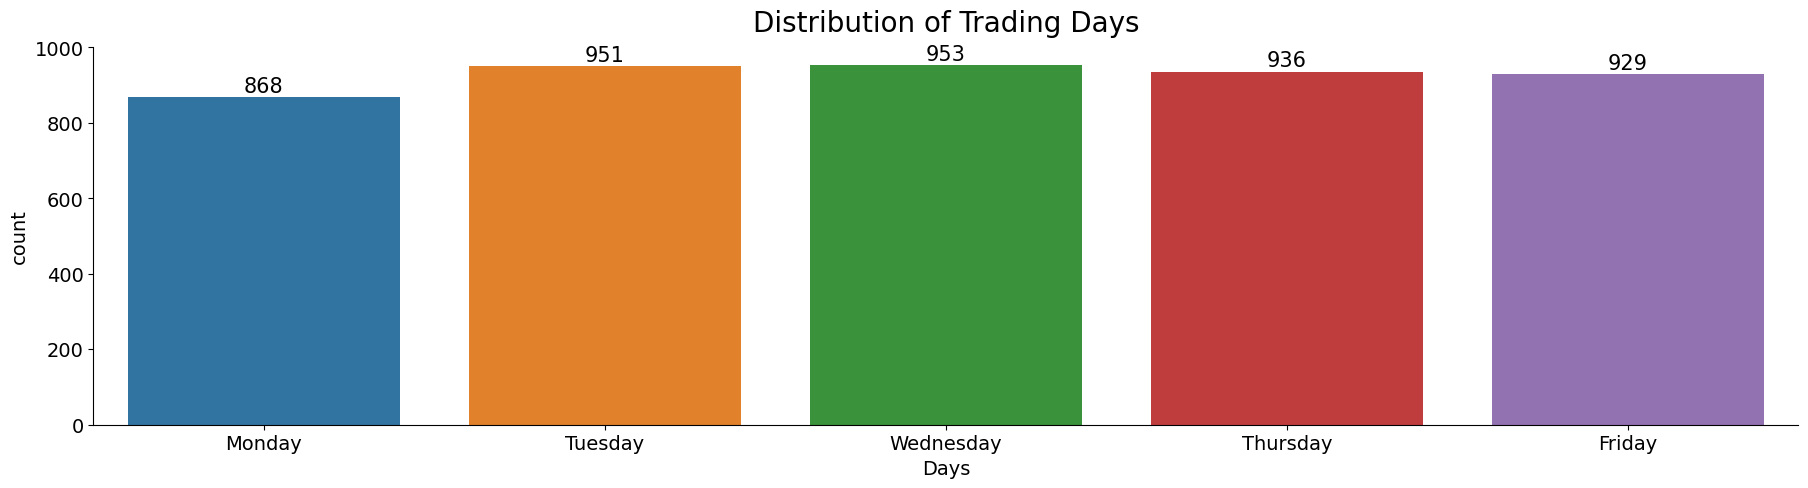

In [19]:
# Creates a countplot using seaborn, with the data being the day of the week from the 'df' dataframe
ax = sns.countplot(df.index.day_name())

# Removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Labels the x-axis
plt.xlabel('Days')

# Adds a title to the plot
plt.title('Distribution of Trading Days', y=1.02, fontsize=20)

# Loops through each bar in the plot and adds an annotation with the height of the bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

# Displays the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Train Test Split
    
</h2>
</div>
    
</center>

Since it's sequential data, what we have done here to split the data into training and test dataset is alloted 75% rows to the training data and the rest of the rows will be used to validate the data.

In [20]:
# Calculate the threshold for splitting the data into training and testing
threshold = int(len(X_resampled)*0.75)

In [21]:
# Split the resampled data into training and testing sets
X_train, y_train = X_resampled.iloc[:threshold, :], y_resampled[:threshold]
X_test, y_test = X_resampled.iloc[threshold:, :], y_resampled[threshold:]

In [22]:
X_train.head()

,Open,High,Low,Close,Volume
0,2.527778,2.729730,2.515015,2.710460,456686856.0
1,2.771522,2.839840,2.728979,2.737738,365122512.0
2,2.783784,2.792793,2.591842,2.624374,304946748.0
3,2.626627,2.702703,2.599600,2.652653,183772044.0
4,2.626376,2.701451,2.619119,2.700450,141897960.0


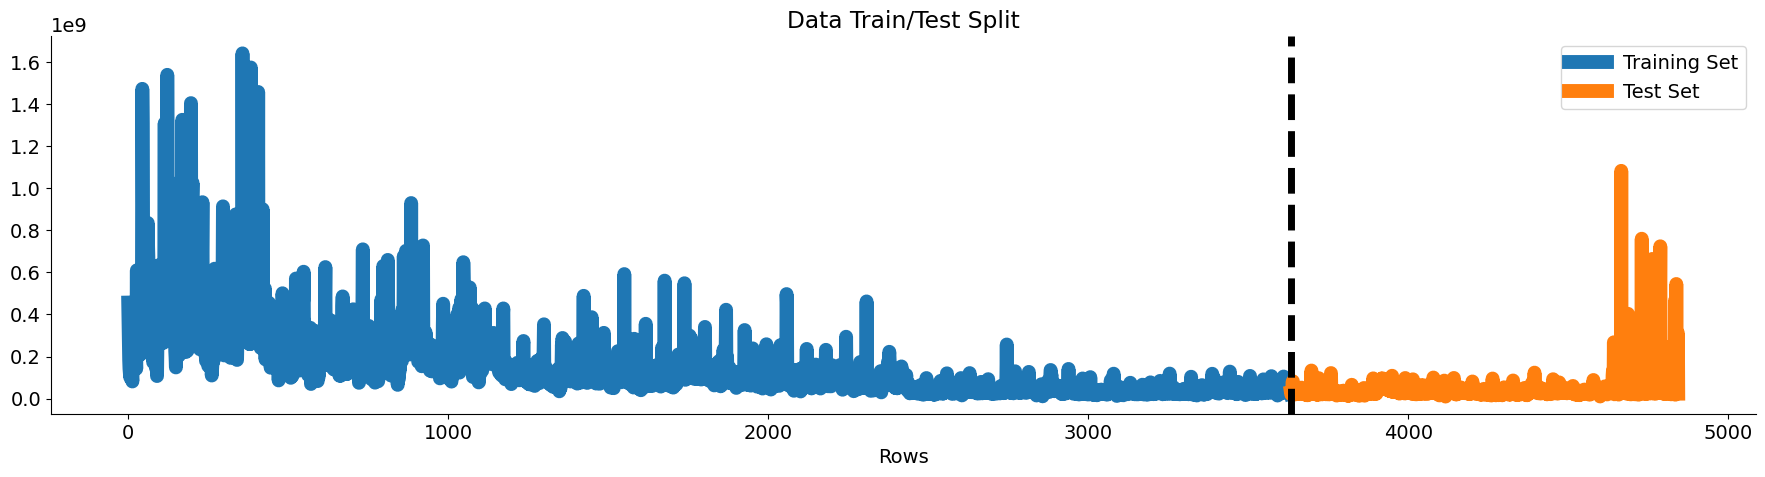

In [23]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
X_train['Volume'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=10)

# Plot the Volume column from the test set on the axis
X_test['Volume'].plot(ax=ax, label='Test Set',  linewidth=10)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline(threshold, color='black', ls='--', lw=5)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Rows')

# Show the plot
plt.show()

In [24]:
print(f'X_train Shape {X_train.shape}, y_train Shape {y_train.shape}')
print(f'X_test shape {X_test.shape}, y_test shape {y_test.shape}')

X_train Shape (3633, 5), y_train Shape (3633,)
X_test shape (1211, 5), y_test shape (1211,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Base Model
    
</h2>
</div>
    
</center>

We are starting off with a base model with the max_depth of 3 and a learning rate of 1 and the rest of parameters are default. 

- In the fit method we are using `Early Stopping` which is an approach to training complex machine learning models to avoid overfitting. It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

- It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit. 

- **XGBoost** supports *early stopping* after a fixed number of iterations. In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.

Since we want to track the performance of the model on the both training and test set, we have given the model training and test set in the form of tuples and we are tracking the classification error and the logloss passed into the `eval_metric` argument.

In [25]:
#1: Instantiate an XGBClassifier with a max_depth of 3 and a learning_rate of 0.1
model = XGBClassifier(max_depth=3, learning_rate=0.1)

#2: Fit the model to the training data, using early_stopping_rounds of 10, 
#with evaluation sets of the training and test data, evaluating on the metrics "error" and "logloss", and set verbose to 0
history = model.fit(X_train, y_train, early_stopping_rounds =10, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)

#3: Make predictions on the test data
predictions = model.predict(X_test)

In [26]:
y_test[:5]

array([0., 0., 1., 1., 0.])

In [27]:
predictions[:5]

array([1, 0, 1, 1, 1])

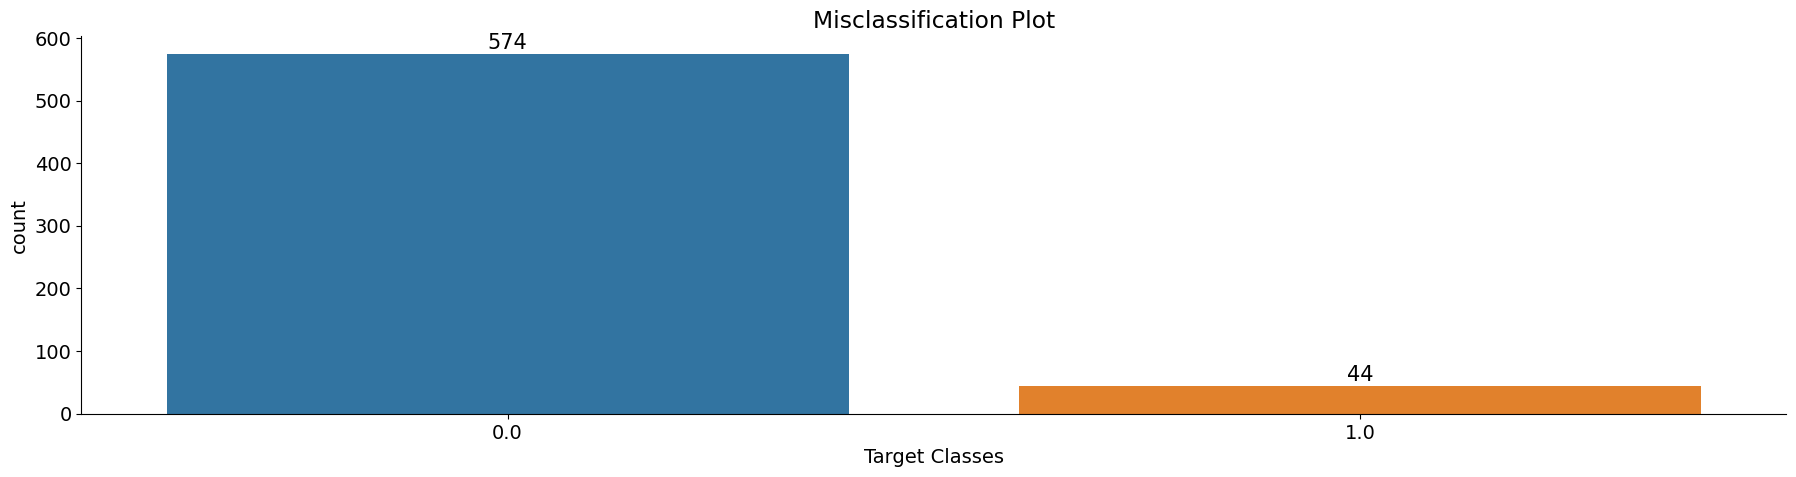

In [28]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.15      0.25       676
         1.0       0.46      0.92      0.61       535

    accuracy                           0.49      1211
   macro avg       0.58      0.53      0.43      1211
weighted avg       0.59      0.49      0.41      1211



Below are the parameters used while training the XGBoost model.

In [30]:
history.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

Let's now try to plot the training and validation loss.

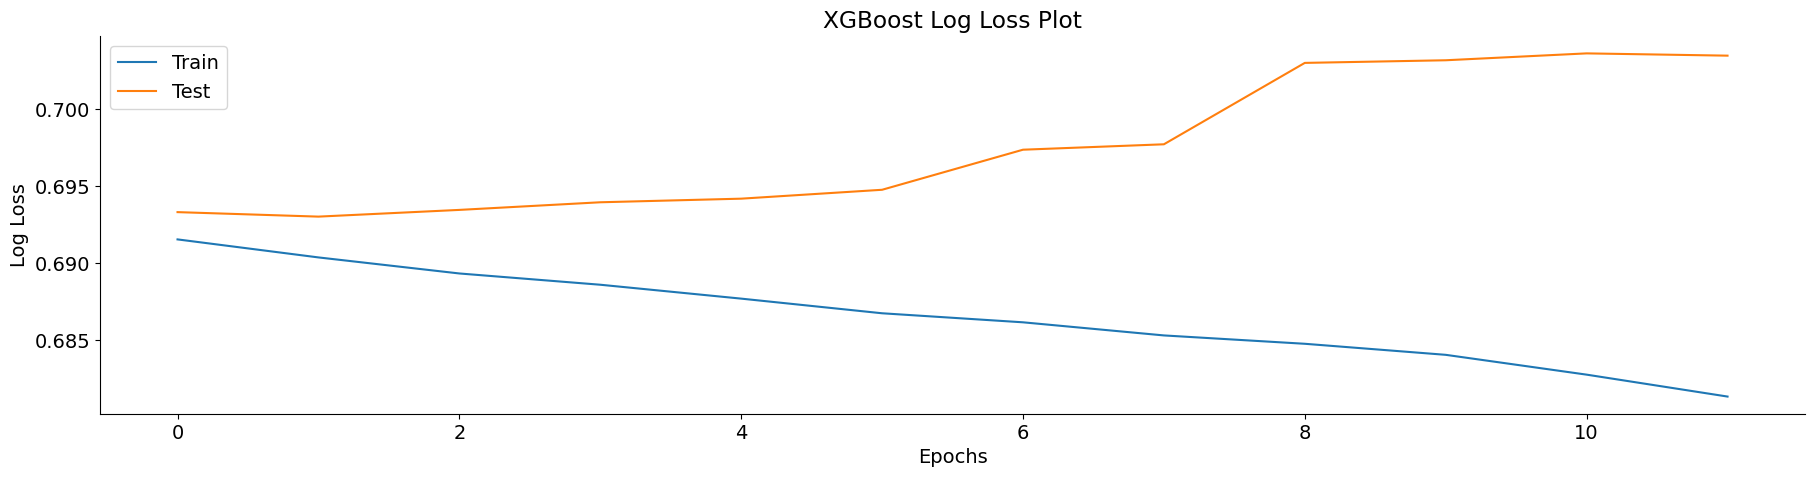

In [31]:
#get the number of epochs (iterations) used in training
epochs = len(history.evals_result_['validation_0']['error'])

#create a range from 0 to the number of epochs
x_axis = range(0, epochs)

#create a figure and axes for plotting
fig, ax = plt.subplots()

#plot the training and test log loss values against the x-axis (epochs)
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test')

#hide the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#show the legend
ax.legend()

#label the axes and add a title
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')

#show the plot
plt.show()

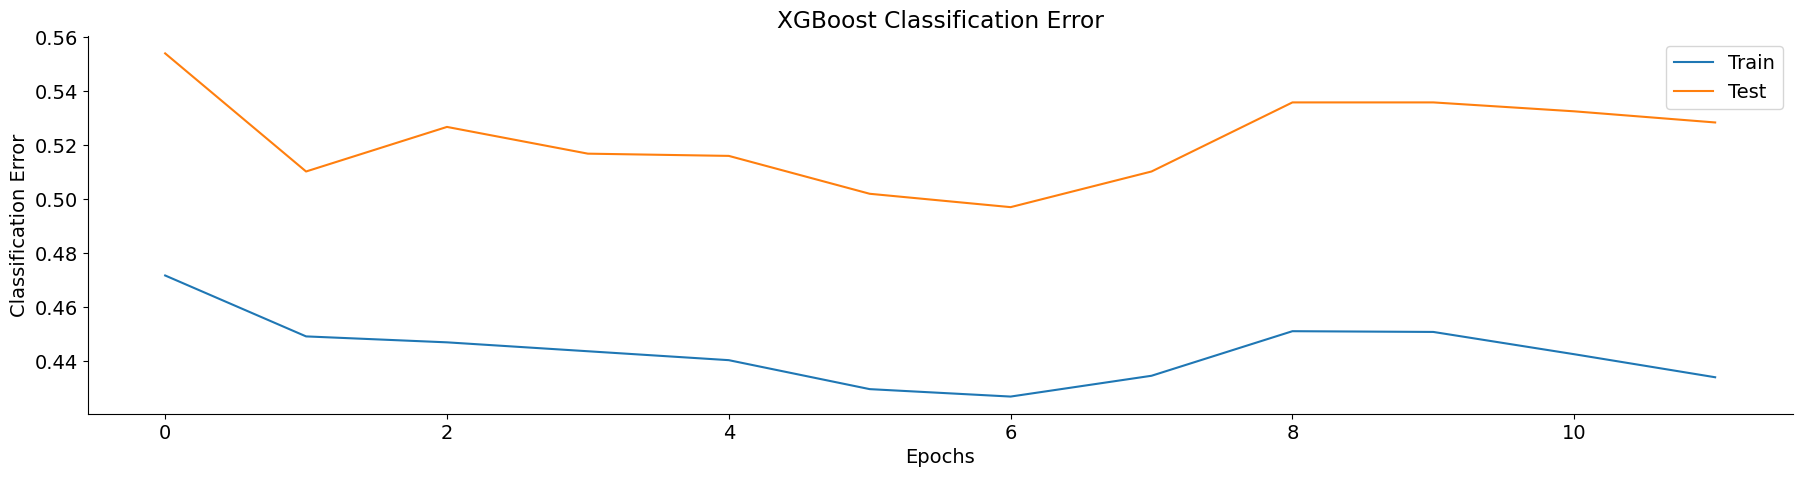

In [32]:
#This line sets the epochs equal to the length of the history object's evaluation result
epochs = len(history.evals_result_['validation_0']['error'])

#This line sets the x-axis range for the graph as 0 to the number of epochs
x_axis = range(0, epochs)

#This line creates the figure and axis objects for the graph
fig, ax = plt.subplots()

#This line plots the training error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train')

#This line plots the test error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test')

#This line removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line adds a legend to the plot
ax.legend()

#This line labels the x-axis as 'Epochs'
plt.xlabel('Epochs')

#This line labels the y-axis as 'Classification Error'
plt.ylabel('Classification Error')

#This line titles the plot as 'XGBoost Classification Error'
plt.title('XGBoost Classification Error')

#This line displays the plot
plt.show()

We see that the model is overfitting and the both the dataset error is somewhat following each other, we are going to go ahead and tune the hyperparameters to get the best parameters for the model.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Increasing Depth and Adding L2 Regularization
    
</h2>
</div>
    
</center>

In [33]:
model = XGBClassifier(max_depth=7, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.16      0.27       676
         1.0       0.46      0.92      0.62       535

    accuracy                           0.50      1211
   macro avg       0.59      0.54      0.44      1211
weighted avg       0.61      0.50      0.42      1211



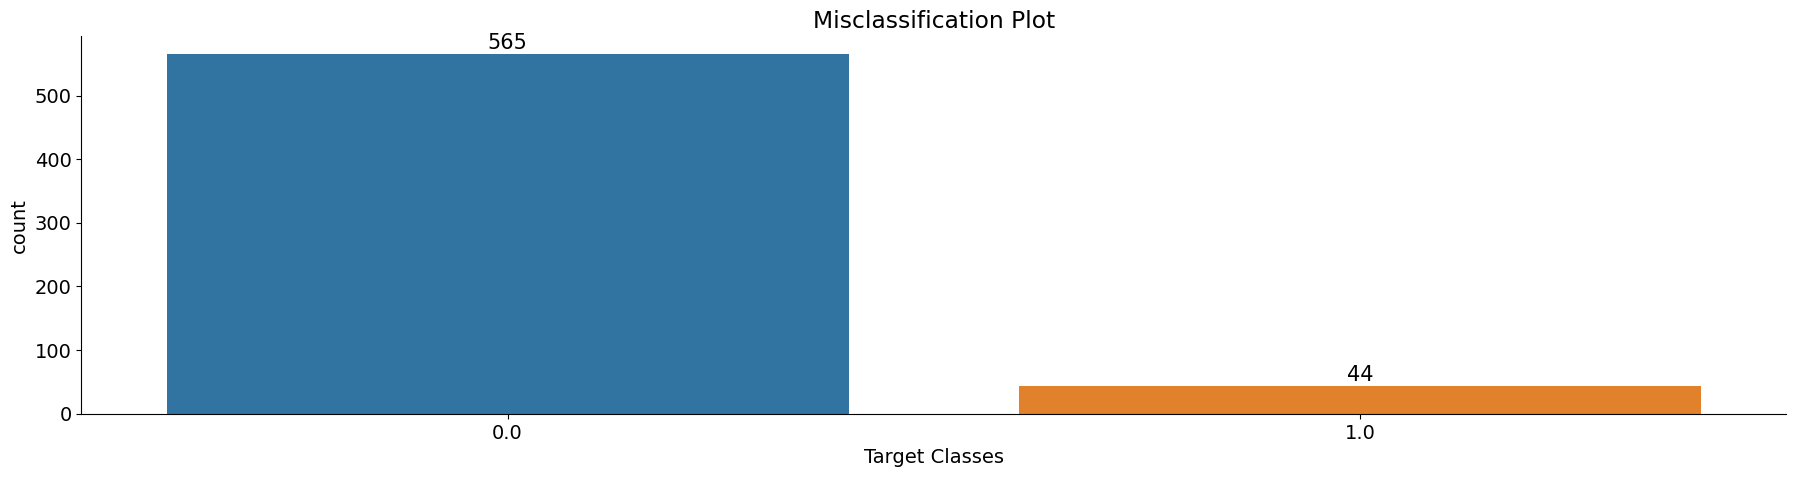

In [34]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Increasing Depth even further
    
</h2>
</div>
    
</center>

In [35]:
model = XGBClassifier(max_depth=15, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.21      0.32       676
         1.0       0.46      0.86      0.60       535

    accuracy                           0.50      1211
   macro avg       0.56      0.53      0.46      1211
weighted avg       0.57      0.50      0.44      1211



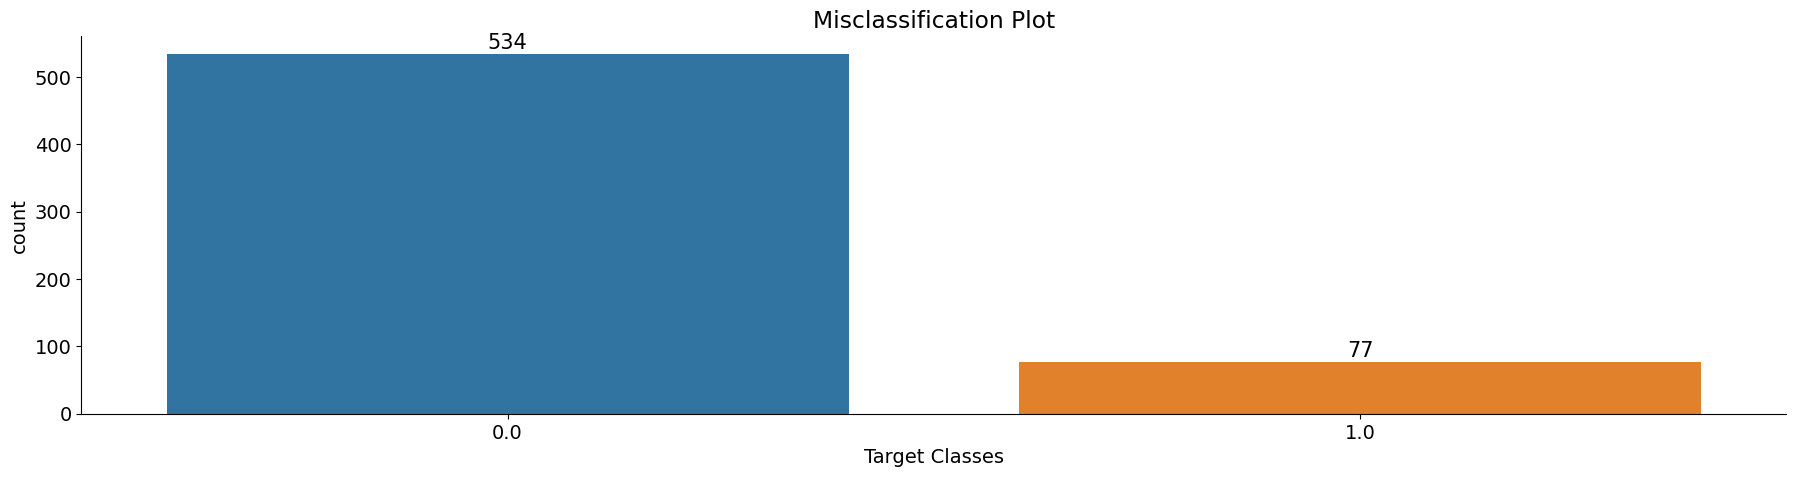

In [36]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
    
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Hyperparameter tuning using GridSearchCV
    
</h2>
</div>
    
</center>

Since **XGBoost** does *pruning* of the trees, we also want to ensure that the model doesn't over fit hence we are tuning the parameters as well to be on the safer side.

In [37]:
param_grid = { 'max_depth' : [18, 21, 25],
             'reg_lambda': [0.1, 0.4, 0.8]
             }

In [38]:
clf = GridSearchCV(model, param_grid= param_grid, cv=3)
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=15, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                          

In [39]:
print(f'The best parameters are {clf.best_params_}')

The best parameters are {'max_depth': 25, 'reg_lambda': 0.1}


In [40]:
print(f'The best model is {clf.best_estimator_}')

The best model is XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Training after hyperparameter tuning
    
</h2>
</div>
    
</center>

In [41]:
model = XGBClassifier(max_depth=25, learning_rate=0.1, reg_lambda=0.8)
history = model.fit(X_train, y_train, early_stopping_rounds =10, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"],verbose=0)
predictions = model.predict(X_test)
print(f'After the Hyperparameter tuning, The learning rate used is {history.learning_rate}.')
print(f'Max depth of the trees is {history.max_depth} and the L2 Regularization used is {history.reg_lambda}')
print('    ')
print(classification_report(y_test, predictions))

After the Hyperparameter tuning, The learning rate used is 0.1.
Max depth of the trees is 25 and the L2 Regularization used is 0.8
    
              precision    recall  f1-score   support

         0.0       0.71      0.33      0.45       676
         1.0       0.49      0.83      0.62       535

    accuracy                           0.55      1211
   macro avg       0.60      0.58      0.53      1211
weighted avg       0.61      0.55      0.52      1211



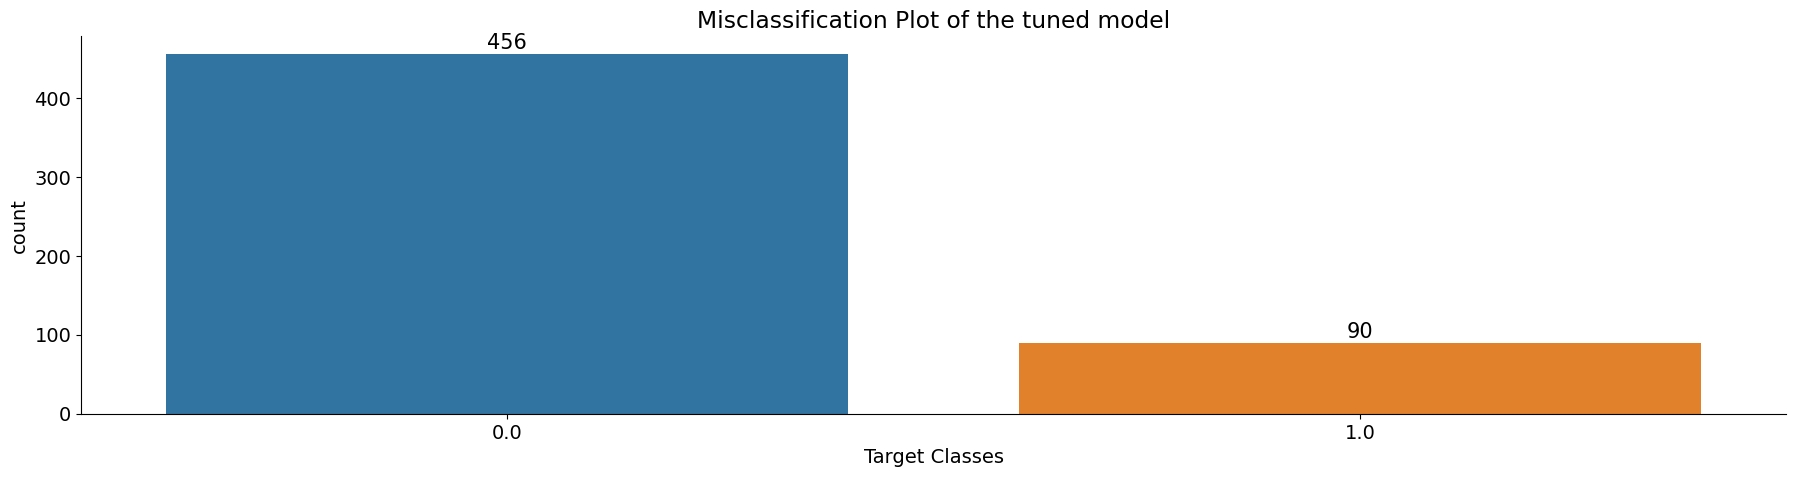

In [42]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot of the tuned model')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

Now lets go ahead and plot the error plot which will help us visualize if there is any overfitting in the model or not.XGBoost uses something known as Log Loss for the error calculation

**Log loss error**, also known as logistic loss or cross-entropy loss, is a **loss function** used in XGBoost models to measure the performance of a classification algorithm. It is the **negative log-likelihood** of the true labels given a prediction. It measures the accuracy of a classification model whose output is a probability value between 0 and 1. 

It is an **important metric** in evaluating XGBoost models since it is designed for binary classification problems and provides a more effective measure than accuracy for those types of problems. Log loss **penalizes false classifications** more heavily than accuracy does, making it **more suitable** for imbalanced classification problems.

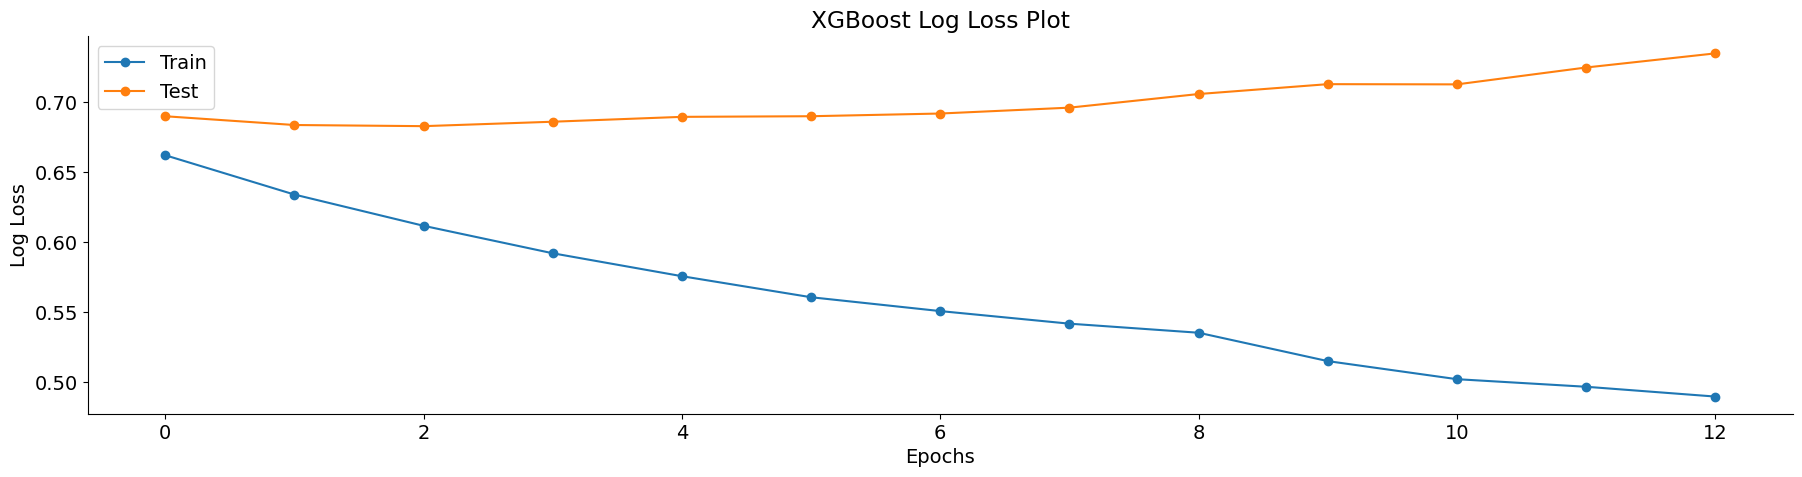

In [43]:
#get the number of epochs (iterations) used in training
epochs = len(history.evals_result_['validation_0']['error'])

#create a range from 0 to the number of epochs
x_axis = range(0, epochs)

#create a figure and axes for plotting
fig, ax = plt.subplots()

#plot the training and test log loss values against the x-axis (epochs)
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train', marker='o')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test', marker='o')

#hide the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#show the legend
ax.legend()

#label the axes and add a title
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')

#show the plot
plt.show()

- Classification error in machine learning is the percentage of incorrectly classified examples in a dataset. It is also known as the misclassification rate and is calculated by dividing the number of incorrectly classified examples by the total number of examples. 

- Classification error is an important metric used to measure the performance of a classification model.

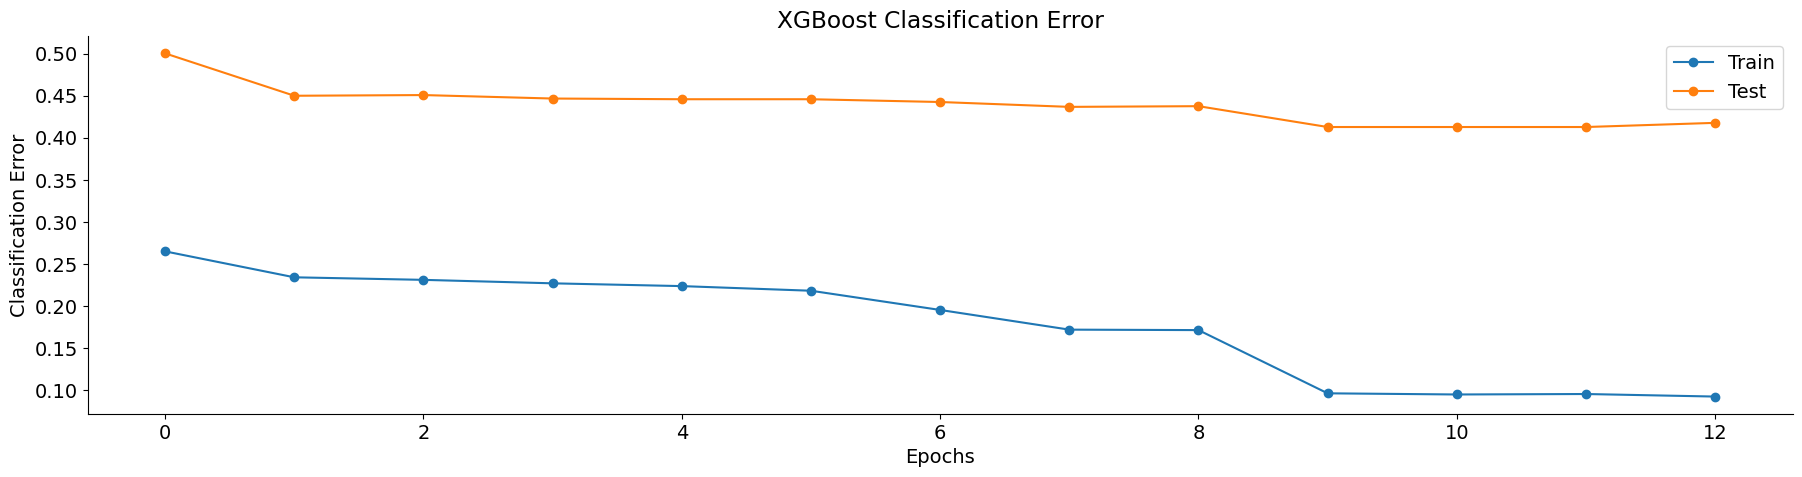

In [44]:
#This line sets the epochs equal to the length of the history object's evaluation result
epochs = len(history.evals_result_['validation_0']['error'])

#This line sets the x-axis range for the graph as 0 to the number of epochs
x_axis = range(0, epochs)

#This line creates the figure and axis objects for the graph
fig, ax = plt.subplots()

#This line plots the training error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train', marker='o')

#This line plots the test error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test', marker='o')

#This line removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line adds a legend to the plot
ax.legend()

#This line labels the x-axis as 'Epochs'
plt.xlabel('Epochs')

#This line labels the y-axis as 'Classification Error'
plt.ylabel('Classification Error')

#This line titles the plot as 'XGBoost Classification Error'
plt.title('XGBoost Classification Error')

#This line displays the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Backtesting
    
</h2>
</div>
    
</center>


<p align="justify"> 
Backtesting is the general method for seeing how well a strategy or model would have done ex-post. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward
</p>

### Understanding Backtesting
    
<p align="justify"> 
Backtesting allows a trader to simulate a trading strategy using historical data to generate results and analyze risk and profitability before risking any actual capital.

A well-conducted backtest that yields positive results assures traders that the strategy is fundamentally sound and is likely to yield profits when implemented in reality. In contrast, a well-conducted backtest that yields suboptimal results will prompt traders to alter or reject the strategy.
</p>

In [45]:
def backtest(data, model, predictors, start=1000, step=50):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        #append the combined values to the predictions 
        predictions.append(combined)
    
    return pd.concat(predictions)

In backtesting, what we are doing is **training the model on first 1000 rows** and then **testing the model on next 50 rows** and this is being done for the entire dataset. This will ensure our model learns from each iteration and is able to make better predictions. 

While making predictions we are using something known as `predict_proba` which is basically giving us the probabilities. The model usually has **0.5 as the threshold** for classifying the data points but we are taking it a step further to 0.6 and then returning those predictions. Feel free to play around with the value and see if values greater than 0.6 and less than 1 are able to give you better results.

In [46]:
start = time.time()
backtestpredictions = backtest(df, model, predictors)
end = time.time()
print(f'Time Elapsed in Backtesting : {round(end-start,2)} seconds')

Time Elapsed in Backtesting : 89.83 seconds


In [47]:
backtestpredictions

,Target,Predictions
Date,,
2008-08-12 00:00:00-04:00,1.0,1.0
2008-08-13 00:00:00-04:00,1.0,0.0
2008-08-14 00:00:00-04:00,0.0,0.0
2008-08-15 00:00:00-04:00,1.0,1.0
2008-08-18 00:00:00-04:00,1.0,1.0
...,...,...
2023-01-17 00:00:00-05:00,1.0,0.0
2023-01-18 00:00:00-05:00,0.0,0.0
2023-01-19 00:00:00-05:00,0.0,0.0


In [48]:
print('Precision Score before adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score before adding predictors 67.83


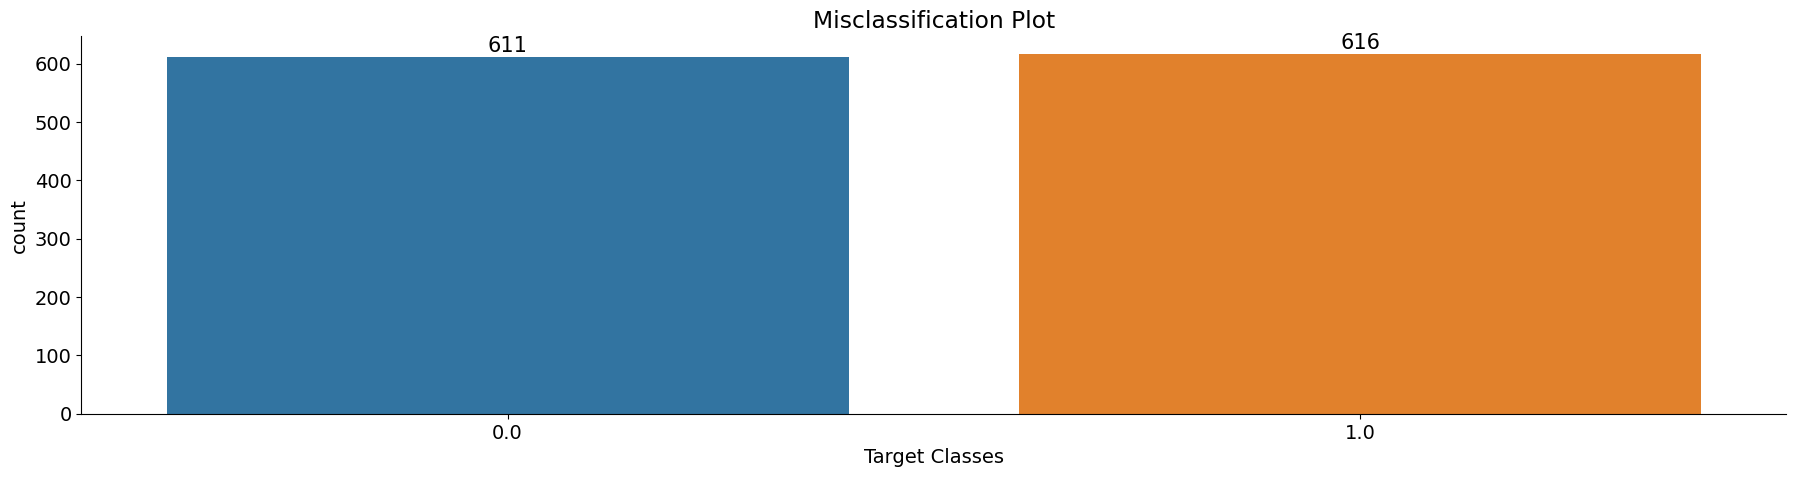

In [49]:
#This line creates a countplot from the data in the "backtestpredictions" dataframe, with the x-axis representing the target classes
ax = sns.countplot(backtestpredictions['Target'][backtestpredictions['Target'] != backtestpredictions['Predictions']])

#This line removes the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line sets the x-axis label
plt.xlabel('Target Classes')

#This line sets the title of the plot
plt.title('Misclassification Plot')

#This loop iterates through each bar in the plot, and adds an annotation with the count of that bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#This line shows the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Adding More Predictors to get better precision
    
</h2>
</div>
    
</center>

One of the ways you can increase model performance is **feature engineering** and that's exactly what we are going to do. In the below code cell, we are adding weekly average, quarterly average, yearly average. 

We are also finding if the weekly trend of our target meaning what was the trend of the price during the week. We are also adding bunch of percentages i.e open-close ratio, annual quarterly mean etc. that would give the model more information about the data and the trend.

Read more [here](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning) on feature selection

In [50]:
# Calculate rolling means
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

# Calculate the weekly trend
weekly_trend = df.shift(1).rolling(7).mean()["Target"]

# Compute the rolling mean ratios and other ratios
df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

#Adding Annual and weekly trends
df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

#Calculate ratio of open and close
df["open_close_ratio"] = df["Open"] / df["Close"]

#Calculate ratio of high and close
df["high_close_ratio"] = df["High"] / df["Close"]

#Calculate ratio of low and close
df["low_close_ratio"] = df["Low"] / df["Close"]

In [51]:
df.head()

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882


In [52]:
print(f'We now have {df.shape[1]} columns after adding more predictors')

We now have 15 columns after adding more predictors


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Imputing Null Values
    
</h2>
</div>
    
</center>

**Imputing Null values** is the process of filling the missing values. Although XGBoost is capable enough of handling missing values, many algorithms might not have such in-built capability. As a general guideline, it's always good to impute the null values. 

Here we are imputing null values because of the backtesting we did earlier. For some of the rows there were no previous data available given the time frame (weekly, annually etc) hence there are some `NaN` values which we will treat by filling the values as 0. This may not be the best strategy but this is the one we are going with.

In [53]:
#iterating over the range of the length of the df DataFrame
for i in range(len(df.columns)):
    #checking if the null value of the particular column is greater than zero
    if df[df.columns[i]].isnull().sum()>0:
        #printing the column number and name that has null values
        print(f'Column {i} {df.columns[i]} null values : {round(df[df.columns[i]].isnull().sum()/df.shape[0]*100,2)}%')

Column 6 weekly_mean null values : 0.13%
Column 7 quarterly_mean null values : 1.92%
Column 8 annual_mean null values : 7.85%
Column 9 annual_weekly_mean null values : 7.85%
Column 10 annual_quarterly_mean null values : 7.85%
Column 11 weekly_trend null values : 0.15%


In [54]:
#filling the missing values with zero
df.fillna(0, inplace=True)

In [55]:
#checking if the values have been filled or not
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Target                   0
weekly_mean              0
quarterly_mean           0
annual_mean              0
annual_weekly_mean       0
annual_quarterly_mean    0
weekly_trend             0
open_close_ratio         0
high_close_ratio         0
low_close_ratio          0
dtype: int64

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Backtesting with new predictors
    
</h2>
</div>
    
</center>

Okay so now that we have added more columns to the data, let's use them to see much of a difference it makes if use them.

In [56]:
predictors  = ['Open', 'High','Low','Close','Volume','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [57]:
start = time.time()
backtestpredictions = backtest(df, model, predictors)
end = time.time()
print(f'Time Elapsed in Backtesting : {round(end-start,2)} seconds')

Time Elapsed in Backtesting : 92.29 seconds


In [58]:
print('Precision Score after adding predictors',
       round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score after adding predictors 85.28


In [59]:
print(classification_report(backtestpredictions['Target'], backtestpredictions['Predictions']))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      1733
         1.0       0.85      0.80      0.83      1904

    accuracy                           0.82      3637
   macro avg       0.82      0.83      0.82      3637
weighted avg       0.83      0.82      0.82      3637




<center>
<div class="alert alert-block alert-success">  
<b>SUCCESS:</b> By adding more predictors, we have been able to get to a better percentage of precision.
</div>
</center>

We will now go ahead and use Statistical Model ARIMA for making predictions. We will predict the Close Figure using the Open, High and Low Values

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white ;">Prediction Using ARIMA Model
    
</h2>
</div>
    
</center>

## ARMA and ARIMA

- ARMA and ARIMA are models used in time series forecasting. ARMA stands for Autoregressive Moving Average and ARIMA stands for Autoregressive Integrated Moving Average. 

- These models are used to analyze and forecast time series data. Both models analyze the current values of the time series and use past values to forecast future values. 

- ARMA models use linear combinations of past values, while ARIMA models use differencing of past values to remove any trend or seasonality that might be present. 

- ARMA and ARIMA models are usually used together to develop an accurate forecast of future values.

**Auto Regressive Model**

- A Statistical model that tries to predict the values based on lagged values and the lag could be chosen as per the wish.
- For Example: Sales of 9th month could be predicted based on 7th and 8th Month.

**Moving Average Model**

- A statistical Model where the **Error's Moving Average** coupled with the **Average of the Dependent Variable** tries to predict the Target Value

- There are two types of Moving averages as of now:-
    1. **Rolling**
        - We use window size and keep on rolling with the values keeping the window size the same. We essentially exclude the last one and then include the next value when moving to the next value.

    2. **Recursive**
        - We keep on adding values but don't really exclude the others.
        
        
**BOX JENKINS METHODOLOGY**

The Box-Jenkins methodology is a statistical approach used to identify, analyze, and forecast time series data. It is a set of techniques used to identify the underlying components of a time series and to model their behavior. 

The Box-Jenkins methodology was developed by George Box and Gwilym Jenkins in the 1960s and is commonly used in econometrics and engineering. 

It involves three main steps: 
1. model identification, 

2. parameter estimation, and 

3. model checking and diagnostics. 

Box-Jenkins models are typically based on linear combinations of autoregressive (AR) and moving average (MA) terms, with the degree of each term determined by trial-and-error. The models are then fitted to the data, and any discrepancies between the model and the data are used to improve the model.


- This methodology assumes the variable must be stationary

Being stationary in time series forecasting means that a time series has constant statistical properties over time, such as mean, variance, and autocorrelation. This means that a given time series behaves in a predictable and consistent way, making it easier to forecast.

**When to use which model**

When the variable is stationary you may go ahead and use the ARMA model however if the variable is not stationary, one must use ARIMA model which is represented as ARIMA (p,d,q) where p is the order of lagged values of the variable, d is the order of difference the variable becomes stationary at and q is the order of lagged values of the error.

**How to find the values of p and q in ARMA or ARIMA**

The values of p and q in an ARMA or ARIMA model are determined by examining the autocorrelation and partial autocorrelation functions (ACF and PACF) of the time series. 

- The value of p is the number of autoregressive terms (AR terms) in the model, and it is the number of lags in the PACF that are significantly non-zero. 

- The value of q is the number of moving average terms (MA terms) in the model, and it is the number of lags in the ACF that are significantly non-zero.

**Auto Correlation Function**

- It is a statistical method used to measure the correlation between a given time series and a lagged version of itself over successive time intervals. 
- This is used to measure the degree of similarity between a series and lagged versions of itself over different time periods.
- It can be used to detect seasonality and other patterns in a time series. 
- The further lag will include the effect of the previous lags
- Used to calculate the lag in Moving Average (q)

**Partial Autocorrelation Function**

- PACF (Partial Autocorrelation Function) is a tool used in Time Series Analysis to identify the correlations between a time series and lagged versions of itself. 
- It is used to determine the number of autoregressive (AR) terms needed for a given time series, as well as the order of any moving average (MA) terms. (p)
- The further lags will not include the effect of the previous lags

**STEPS TO MAKING FORECASTING IN TIME SERIES**

1. Identification - ARMA or ARIMA
2. Estimation - Finding out which model is the best. Different combinations or AR and MA is used to figure out which model is the best. The criteria to find out the best model is:
    - Significance of Variable (among the AR and MA Combo) should be high
    - Volatility should be minimum
    - Adjusted $r^2$ should be maximum.
    - AIC and SIC should be minimum
3. Diagnostic Test -  Errors should be stationary, if not you go back to the first step an repeat the process until the error becomes stationary.
4. Predictions

In [60]:
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

## Stationarity Check
- Stationarity check is a method of testing whether a time series data is stationary or not. It is done by plotting the data in a graph and checking for any clear trend and seasonality. Stationarity can be determined by looking at the mean, variance, and autocorrelation of the data.

- If a time series is stationary, the mean, variance, and autocorrelation should remain constant over time. If the mean, variance, or autocorrelation change over time, the time series is non-stationary.

In [61]:
for i in df.columns[:4]:
    #Checking the stationarity of the data
    result = ts.adfuller(df[i])

    #Printing the test results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    #Interpreting the test results
    if result[1] <= 0.05:
        print(i,'is stationary')
    else:
        print(i,'is not stationary')
    print('   ')

ADF Statistic: -0.197822
p-value: 0.938781
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Open is not stationary
   
ADF Statistic: -0.080000
p-value: 0.951395
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
High is not stationary
   
ADF Statistic: -0.202130
p-value: 0.938267
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Low is not stationary
   
ADF Statistic: -0.087651
p-value: 0.950655
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Close is not stationary
   


## Seasonal Decomposition of the Series
- Seasonal Decomposition of a series is a statistical process used to remove seasonal patterns from a time series dataset. This process involves breaking down the data into three components: the trend, the seasonal component, and the residuals.

- The trend component is a smooth representation of the series, the seasonal component is the characteristic pattern that repeats over time, and the residuals are the remaining variations in the data that are not explained by the trend and seasonal components.

- Seasonal Decomposition can be done using various techniques, such as moving average, smoothing, and exponential smoothing.

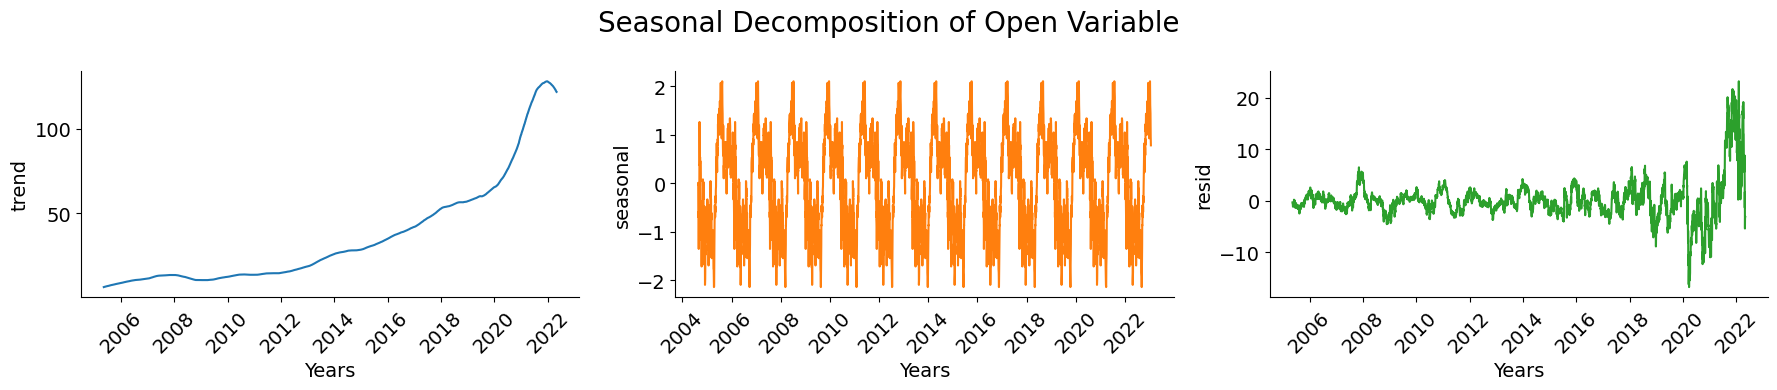

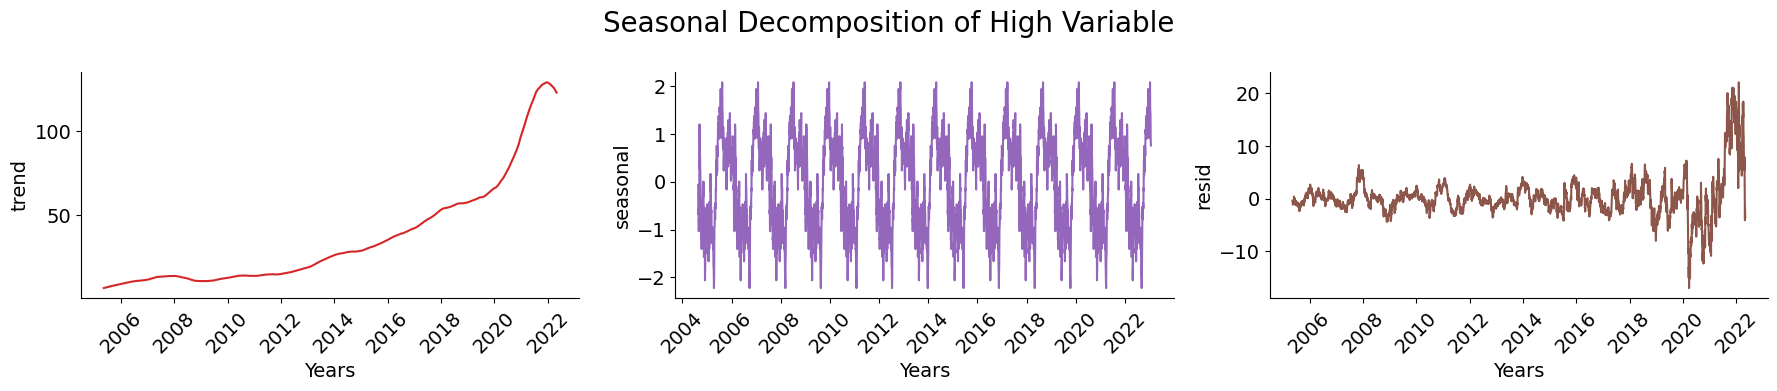

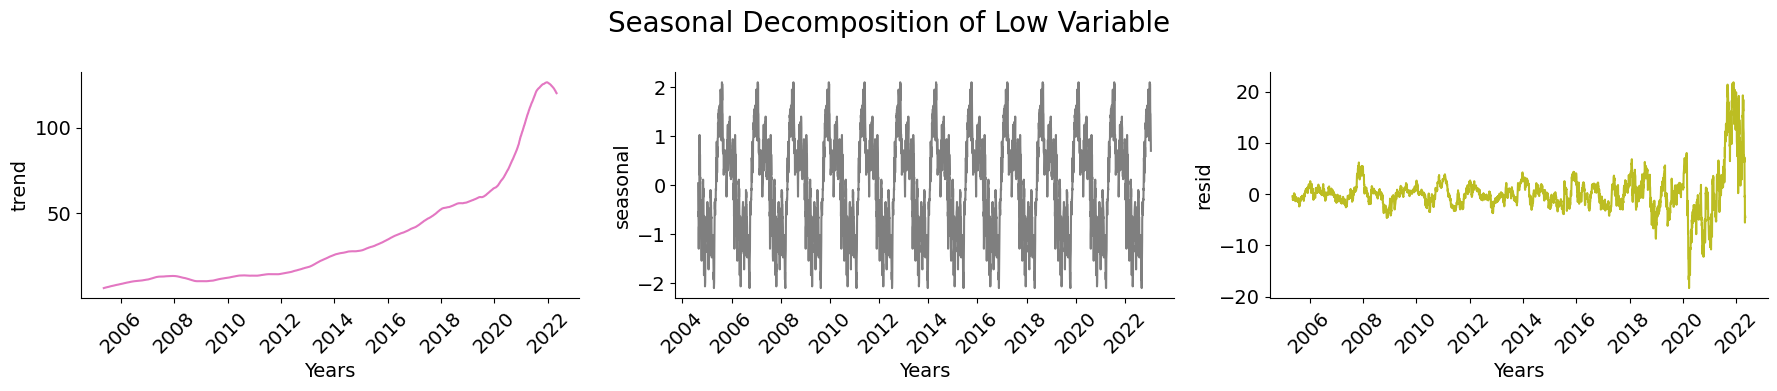

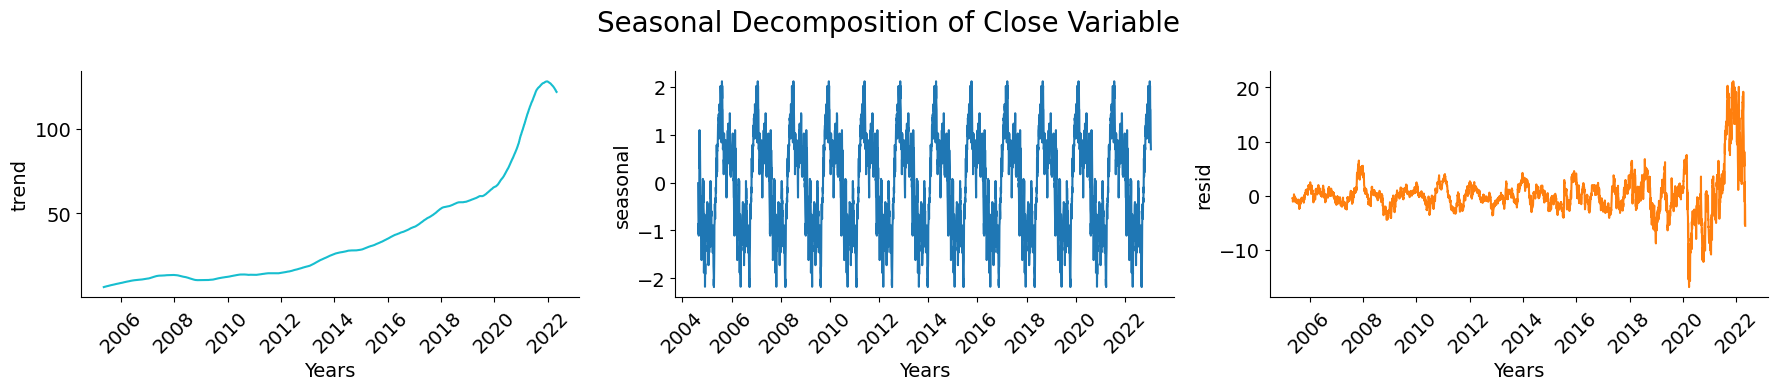

In [62]:
colors = plt.rcParams["axes.prop_cycle"]()
for j in df.columns[:4]:
    results = seasonal_decompose(df[j], period=365)
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c) 
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()    
    plt.show()

## Finding out the orders for p and q


The p and q values in ARIMA are determined using a process called autocorrelation function (ACF) and partial autocorrelation function (PACF). 

- The ACF and PACF help to identify the number of autoregressive (p) and moving average (q) terms needed in the model. 

- Generally, if the ACF shows a sharp cutoff and the lag-1 autocorrelation is positive, you should use an AR model (p). If the PACF shows a sharp cutoff and the lag-1 autocorrelation is negative, you should use an MA model (q). 

- If there is a gradual decline, you should use a combination of both (p and q). Finally, the order of the AR and MA model must be determined by minimizing the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).

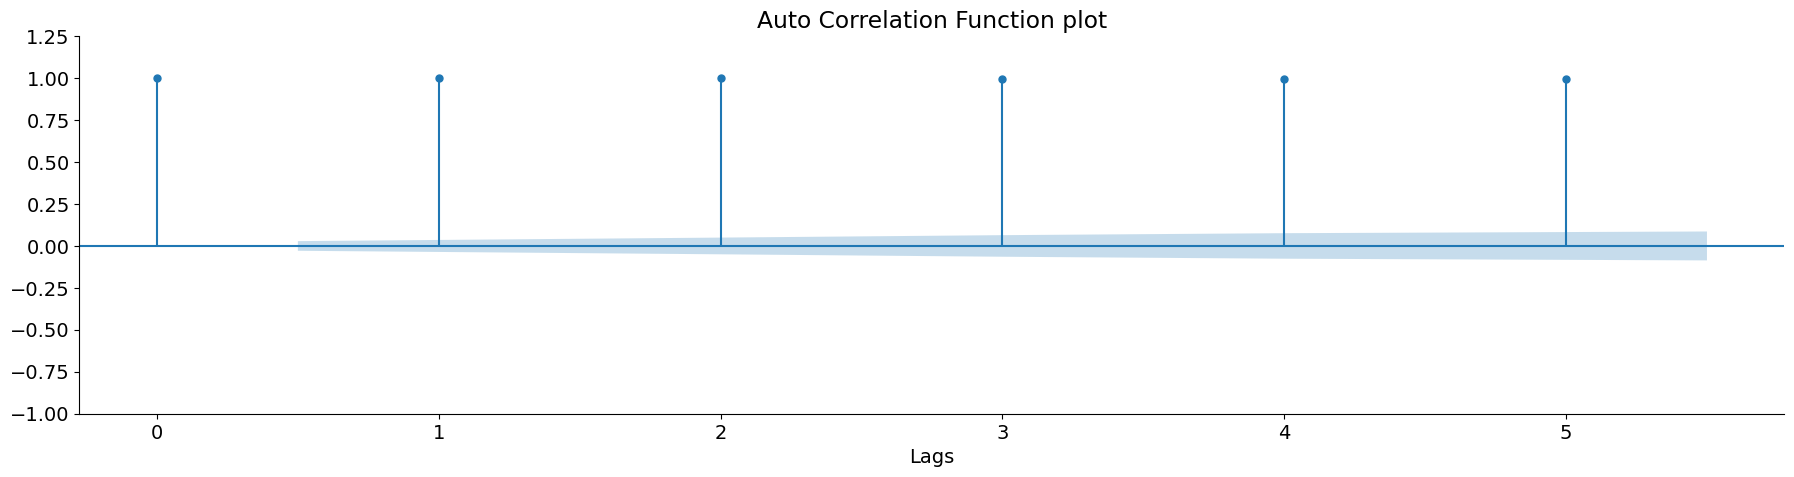

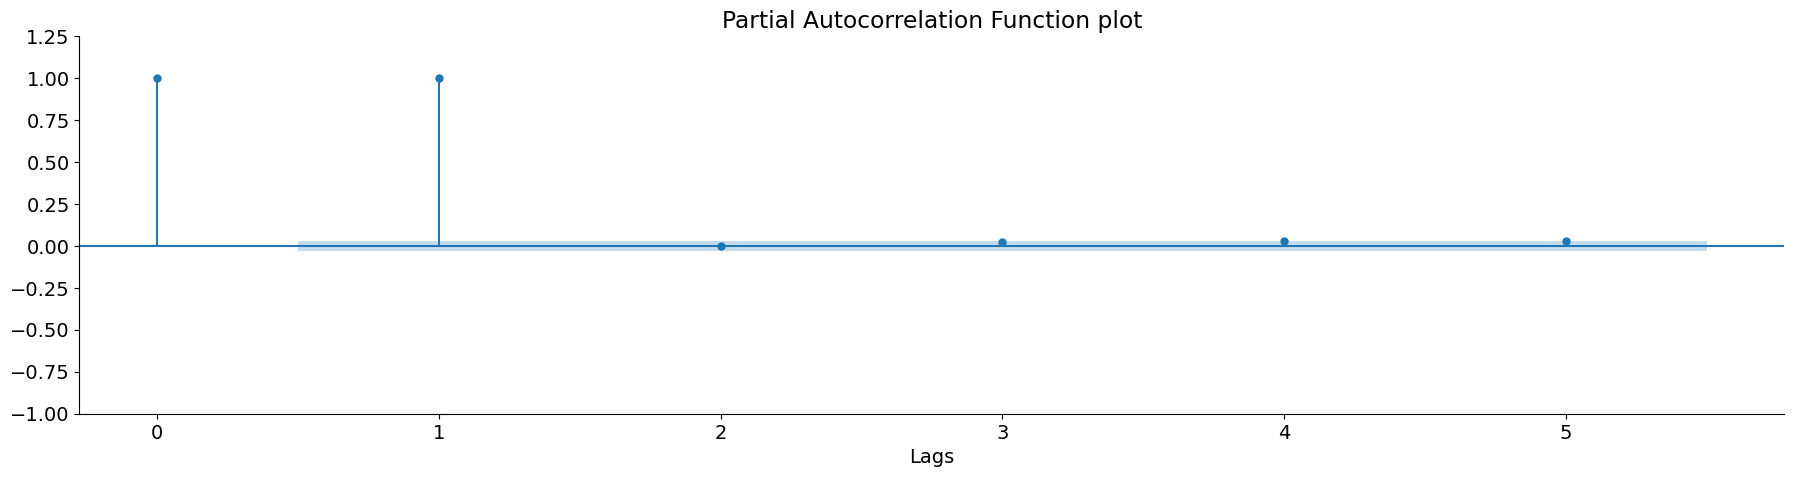

In [63]:
# plot the ACF plot
plot_acf(df.High, lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# plot the PACF plot
plot_pacf(df.High, lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

## For Integrated Order (d)
- Integrated order (I) is a parameter in an ARIMA model that refers to the number of times the data have been differenced in order to make it stationary.

- A value of 0 indicates that the data has not been differenced, while a value of 1 indicates that the data has been differenced once. Higher values indicate that the data has been differenced multiple times.

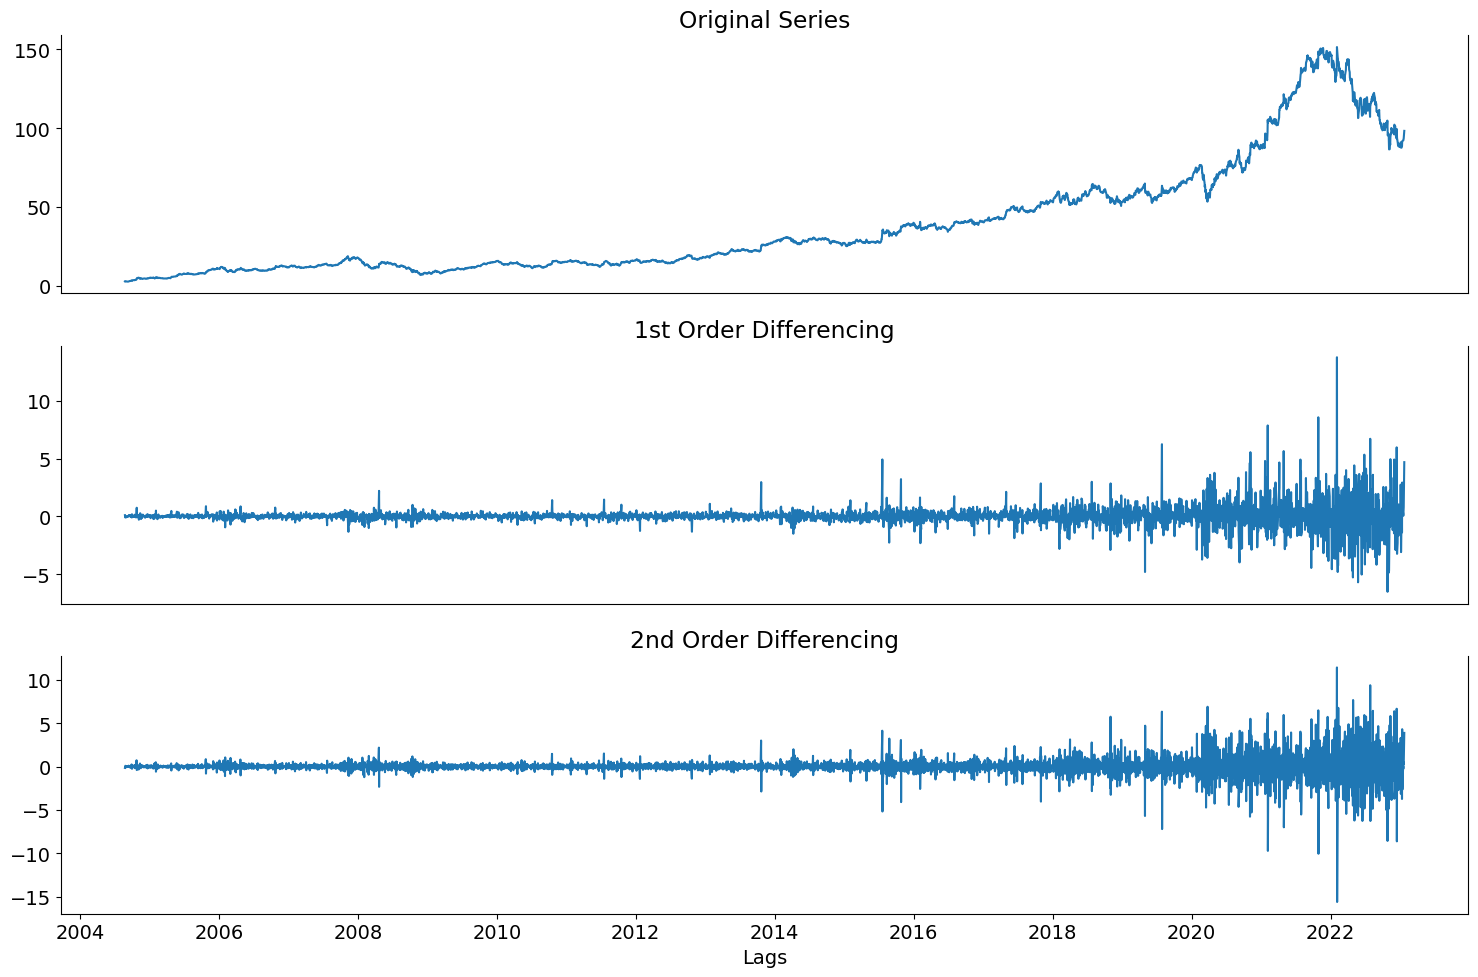

In [64]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(df.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(df.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()

Since the series has become stationary at 1st order differencing, we will take d as 1.

## For MA Order (q)
- A moving average model is a type of time series model that uses historical data to forecast future values. It is a simple and widely used technique that can be used to smooth out short-term fluctuations in data and highlight longer-term trends and cycles.

- The model is based on the idea that the value of a time series at any given point is a function of the average of the values of the previous few points. The number of points used to calculate the average is called the window size.

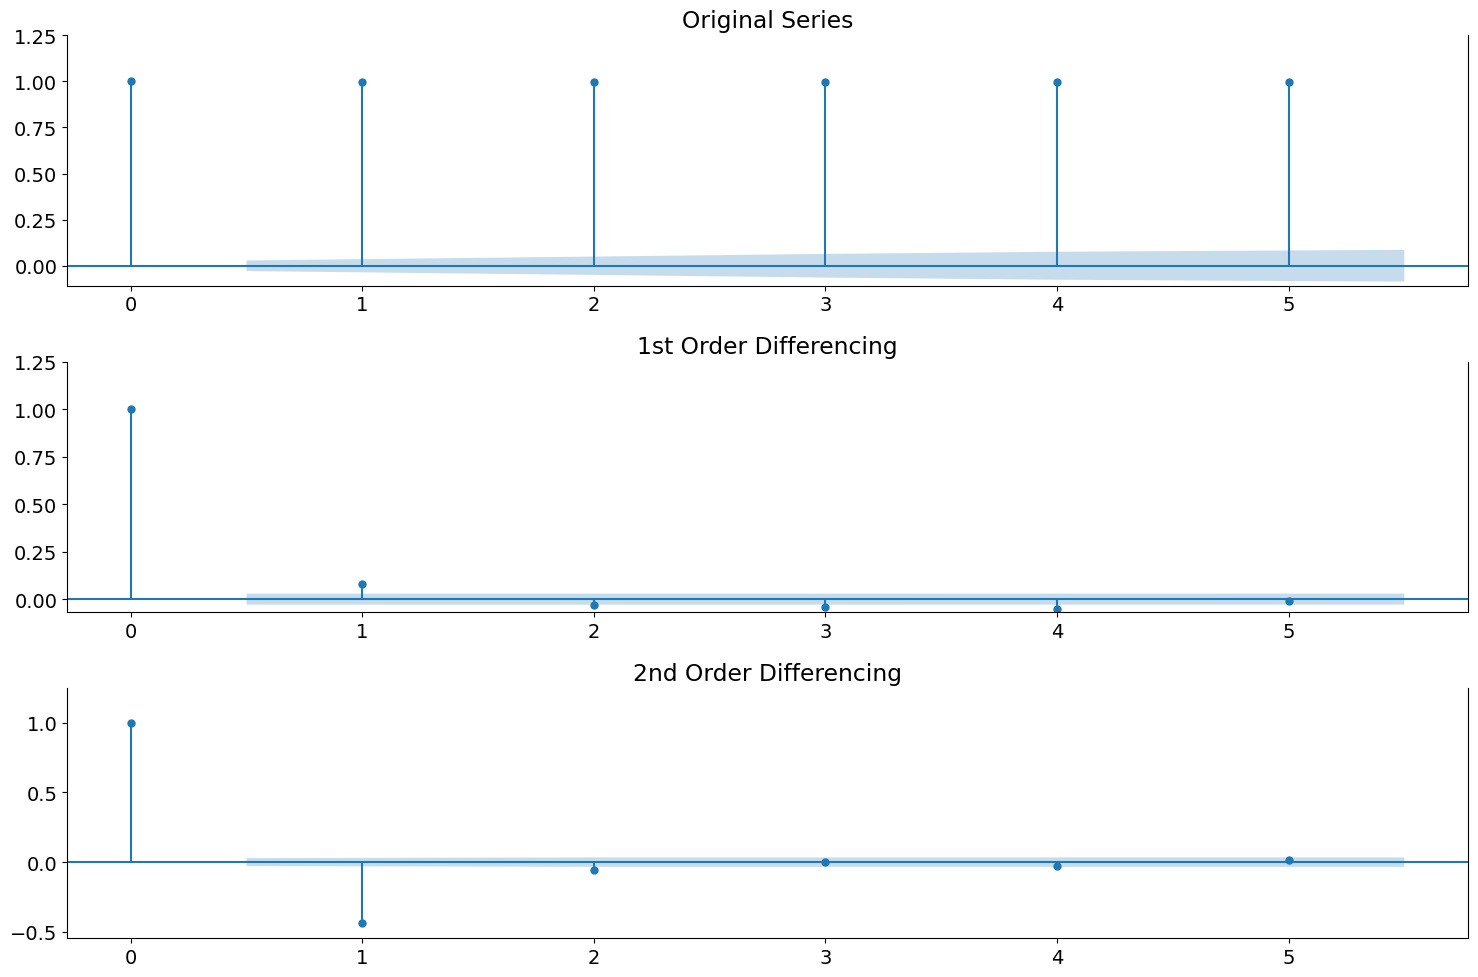

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df.High, ax=ax1, auto_ylims=True, lags = 5,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df.High.diff().dropna(), auto_ylims=True, lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## For AR order (p)
- An autoregressive (AR) model is a type of a statistical model used in time series analysis that uses observations from the past to predict future values.

- It is a type of regression analysis where the output variable (Y) is modeled as a linear function of its own past values and a noise term (epsilon).

- AR models are used to describe and analyze time-dependent phenomena such as stock prices, economic cycles, and ecological phenomena.

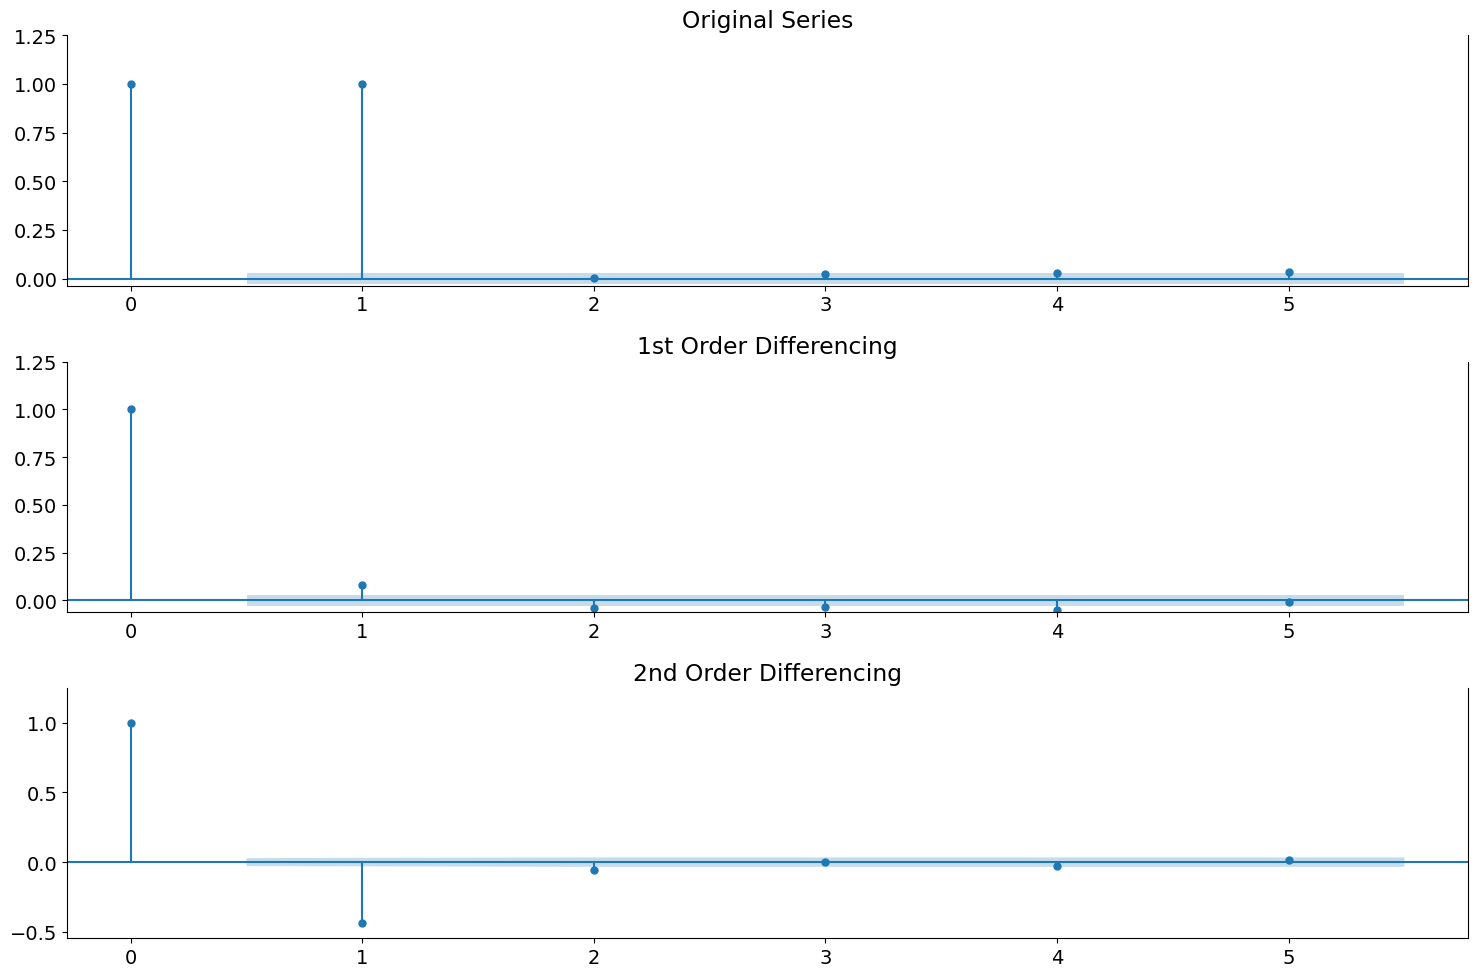

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df.High, auto_ylims=True, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df.High.diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


You should stop looking further for p and q values when the ACF and PACF plots show a sharp cut-off or when the correlation values of the lags drop below a certain threshold. 

This usually indicates that the pattern of the data has been captured and adding additional lags would not provide any additional information.

## Why ARIMA is better than ARMA?

We can technically use the ARMA model ARIMA, or AutoRegressive Integrated Moving Average models, are better than ARMA models because 

- they are more flexible and can account for non-stationary data. 
- ARIMA models can use differencing of the data to remove trend and seasonality, which ARMA models cannot do. 
- ARIMA models also allow for the inclusion of a seasonal component in the model, which ARMA models cannot do.

## Splitting the data

Before fitting the model lets split the data. Splitting the data here in Time Series is a bit different from the typical Machine Learning Algorithms dataset splitting. Since there is a sequence and we don’t want the model to learn the empty gaps (because of the random splitting), we will split the data based on the year.

We have picked the data prior to 2020 for training data and the remaining data for the testing purposes

In [67]:
train = df[df.index.year<2020]
test = df[df.index.year>=2020]

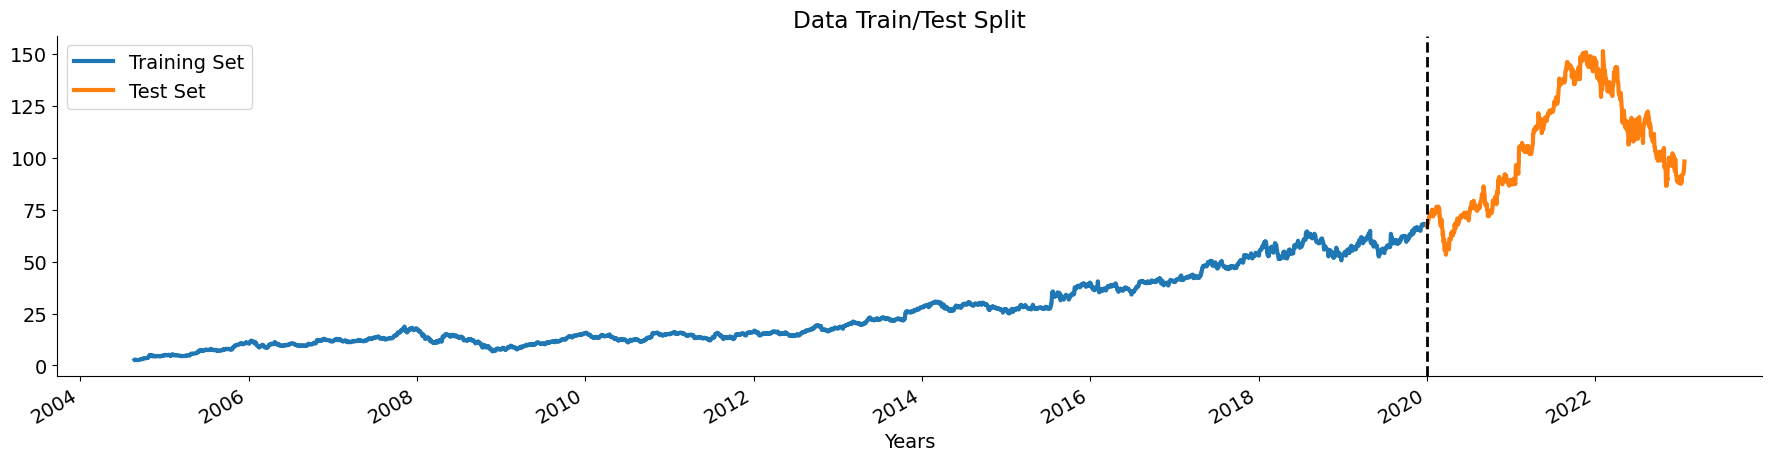

In [68]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2020-01-01', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [69]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 3867 rows in the training set and 770 rows in the test set


In [70]:
exogenous_features = ['Open', 'High', 'Low']
train = train[train.columns[:4]]
test = test[test.columns[:4]]

In [71]:
train.head()

,Open,High,Low,Close
Date,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450


In [72]:
import warnings 
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3867
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1770.361
Date:                Mon, 23 Jan 2023   AIC                          -3528.722
Time:                        21:35:07   BIC                          -3491.163
Sample:                             0   HQIC                         -3515.385
                               - 3867                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5615      0.006    -96.368      0.000      -0.573      -0.550
High           0.7750      0.005    150.396      0.000       0.765       0.785
Low            0.7870      0.005    166.993      0.000       0.778       0.796
ar.L1         -0.0658      0.008     -7.778      0.000      -0.082      -0.049
ma.L1         -0.9998      0.003   -307.385      0.000      -1.006      -0.993
sigma2         0.0234      0.000     89.339      0.000       0.023       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              9485.55
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               8.22   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now that the model is trained let's go ahead and make the predictions on the training data and later the test data

In [73]:
train['Predictions'] = model_fit.predict()

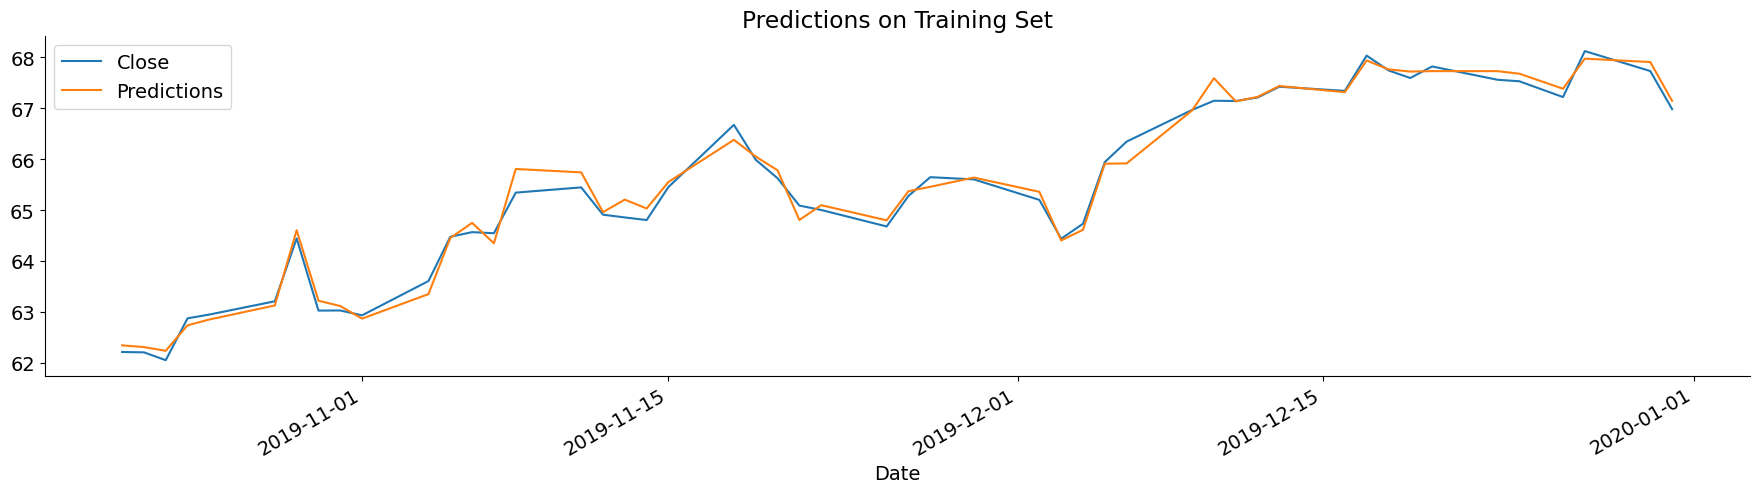

In [74]:
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [75]:
#Making Predictions on Test Set
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]
test['Forecast'] = forecast

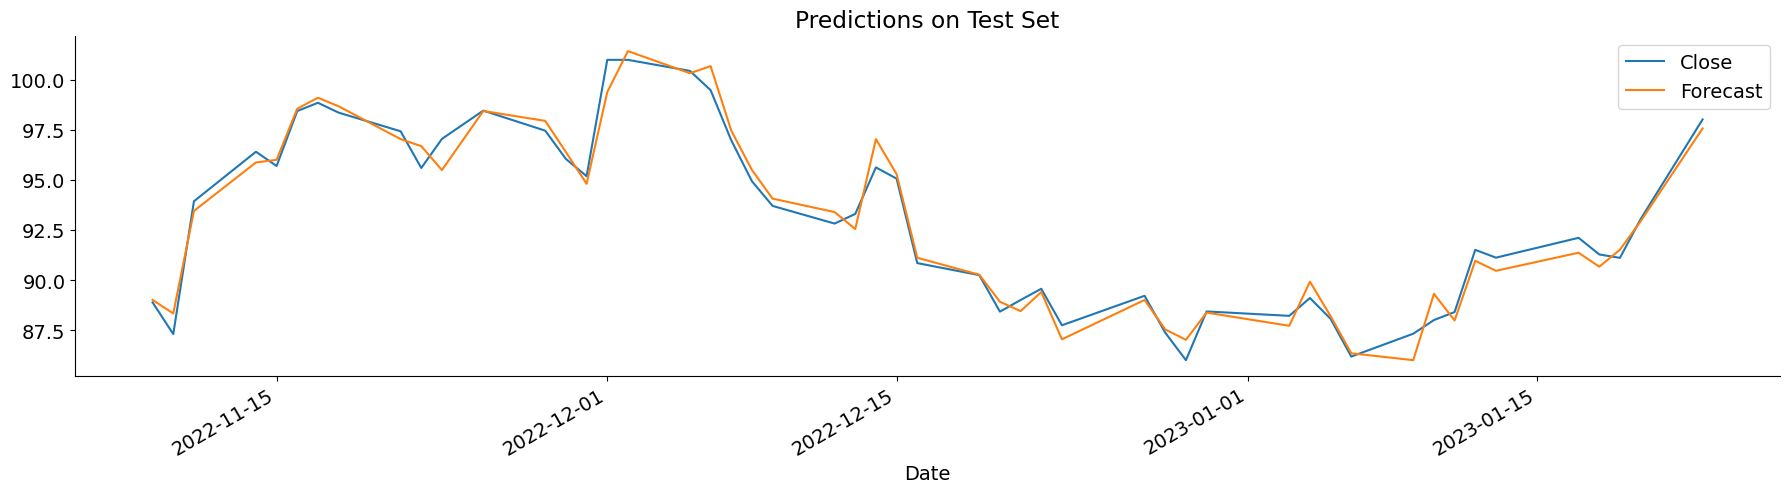

In [76]:
test[['Close','Forecast']][-50:].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.7477


In [78]:
test

,Open,High,Low,Close,Forecast
Date,,,,,
2020-01-02 00:00:00-05:00,66.789497,67.032997,66.606499,66.969498,66.876931
2020-01-03 00:00:00-05:00,67.420502,68.433998,67.324501,68.433998,68.173472
2020-01-06 00:00:00-05:00,67.400002,68.687500,67.365997,68.075996,68.414108
2020-01-07 00:00:00-05:00,67.581497,69.916000,67.550003,69.890503,69.409122
2020-01-08 00:00:00-05:00,70.023003,70.175003,69.578003,69.755501,69.834908
...,...,...,...,...,...
2023-01-17 00:00:00-05:00,90.849998,92.190002,90.129997,92.120003,91.376339
2023-01-18 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,90.680473
2023-01-19 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,91.526122


With that, we are **done** with Predictions using ARIMA Model. We will now use **Deep Learning** to predict the stock values.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white ;">DEEP LEARNING 
    
</h2>
</div>
    
</center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: white;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black ;">Using Neural Network for predictions
    
</h2>
</div>
    
</center>

For a Sequential data like Stock Market, using a model that doesn't use the sequence of the data to predict the values is probably not a good idea because some or the other way we are loosing the information that's hidden in the sequence of the data. 

**Enter Recurrent Neural Network**

Neural Networks are widely used these days for many tasks. Take the example of GMail, the autocompletion feature is there because of the Neural Networks being able to predict the sequence of the next word. The kind of the Neural Networks that enables the predictions is called Recurrent Neural Network.

There are basically 3 types of Recurrent Neural Networks. 

1. **RNN** (Recurrent Neural Networks), 
2. **LSTM** (Long Short Term Memory); and 
3. **GRU** (Gated Recurrent Unit)

RNNs are not used that much because of the vanishing gradient descent problem which basically means the longer the network gets, the earliest neurons stop training because the weights become so small there is hardly any change in them. 

LSTMs and GRUs however have a different mechanism that overcomes this issue of gradient descent. The in-depth working of LSTM and GRUs is beyond the scope of the notebook however the GIF below helps us understand the working of GRU a bit better

**P.s** GRUs are fast and efficient since they have only 2 gates which results in lesser parameters as compared to LSTMs. We are going to be using GRU for the prediction of the Stock Market.

<center> <img src="https://camo.githubusercontent.com/135060228df108b629a4e64e175962552df9d813119769461cb6f9bb30f13bf3/68747470733a2f2f692e696d6775722e636f6d2f3577333775587a2e676966"> </center>

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [80]:
df

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972570,1.000371,0.969882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17 00:00:00-05:00,90.849998,92.190002,90.129997,92.120003,26309900.0,1.0,0.968845,1.041472,1.325335,1.367954,1.272559,0.571429,0.986214,1.000760,0.978398
2023-01-18 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,32602400.0,0.0,0.985619,1.048731,1.336070,1.355564,1.273987,0.714286,1.008435,1.010516,0.986417
2023-01-19 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,29116700.0,0.0,0.993384,1.048583,1.337205,1.346111,1.275250,0.714286,1.011194,1.018437,0.994732


In [81]:
#getting rid of the volume and target columns and using these predictors 
predictors  = ['Open', 'High','Low','Close','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [82]:
#creating a new dataframe with the new predictors
NN_df = df[predictors]

In [83]:
NN_df.head()

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,0.0,0.0,0.0,0.0,0.0,0.0,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,0.0,0.0,0.0,0.0,0.0,0.0,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,0.0,0.0,0.0,0.0,0.0,0.0,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,0.0,0.0,0.0,0.0,0.0,0.0,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,0.0,0.0,0.0,0.0,0.0,0.0,0.972570,1.000371,0.969882


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Scaling Input data
    
</h2>
</div>
    
</center>

**Types of scaling in machine learning**

1. **Normalization**: Normalization is a technique used to scale a dataset so that all values are within a similar range, usually between 0 and 1, or -1 and 1. Typically, this is done by subtracting the mean of the dataset from the value of each element and then dividing the result by the standard deviation. 

2. **Standardization**: Standardization is a technique used to scale a dataset so that its mean is 0, and its standard deviation is 1. This is done by subtracting the mean from each value and dividing it by the standard deviation.

3. **Min-Max Scaling**: Min-Max scaling is a technique used to scale a dataset so that the values lie within a defined range. Typically, this range is between 0 and 1, or -1 and 1. Min-Max scaling involves subtracting the minimum value from each element, and then dividing that result by the difference between the maximum and minimum values.

4. **Robust Scaling**: Robust scaling is a technique used to scale a dataset so that it is robust to outliers. It works by subtracting the median of the dataset from each element and then dividing it by the interquartile range. This ensures that the scaling takes into account the outliers, so they don't affect the overall scaling.

In [84]:
#Initiating the MinMaxScaler object
scaler = MinMaxScaler()
#Fitting the data on the NN_df dataframe
scaler.fit(NN_df[NN_df.columns])
#Transforming the values after fitting the data
NN_df[NN_df.columns] = scaler.transform(NN_df[NN_df.columns])

As we can now see that the data is now scaled which is super helpful for faster convergence of a neural network.

In [85]:
NN_df

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,0.000306,0.001233,0.000267,0.001410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072369,0.063719,0.415891
2004-08-24 00:00:00-04:00,0.001945,0.001972,0.001728,0.001595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511416,0.334254,0.974084
2004-08-25 00:00:00-04:00,0.002027,0.001656,0.000791,0.000825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777920,0.575175,0.899585
2004-08-26 00:00:00-04:00,0.000971,0.001051,0.000844,0.001017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389449,0.169106,0.837990
2004-08-27 00:00:00-04:00,0.000969,0.001043,0.000978,0.001342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292438,0.003323,0.756032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17 00:00:00-05:00,0.593998,0.601635,0.598635,0.608252,0.856105,0.652434,0.651125,0.716700,0.831981,0.571429,0.367562,0.006810,0.825010
2023-01-18 00:00:00-05:00,0.602132,0.602038,0.598089,0.602619,0.870926,0.656981,0.656399,0.710209,0.832914,0.714286,0.489912,0.094250,0.889970
2023-01-19 00:00:00-05:00,0.602669,0.605729,0.602119,0.601465,0.877788,0.656888,0.656957,0.705256,0.833740,0.714286,0.505105,0.165246,0.957328


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Generating Input and Output Data
    
</h2>
</div>
    
</center>

In [86]:
def df_to_X_y2(df, window_size=13):
    """
    Function to convert a dataframe of values into X (data) and y (labels)
    
    Parameters: 
       df: Pandas DataFrame
       window_size: integer representing the size of the window to be used (default 16)
       
    Returns: 
       X: Numpy array of data
       y: Numpy array of labels
    """
    # Convert DataFrame to Numpy array
    df_as_np = df.to_numpy()
    #initiate the empty lists
    X = []
    y = []
    # Iterate through the array, adding the window of values to X and the corresponding label to y
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        #Append the row to X list
        X.append(row)
        label = df_as_np[i+window_size][0]
        #appending the labels to y list
        y.append(label)
    # Return X and y as Numpy arrays
    return np.array(X), np.array(y)

In [87]:
#Generating the X and y values using the function we just created
X, y = df_to_X_y2(NN_df)

print(f'X shape {X.shape} y shape {y.shape}')
print(f'There are {X.shape[0]} samples, {X.shape[1]} timesteps and {X.shape[2]} features in the our data')

X shape (4624, 13, 13) y shape (4624,)
There are 4624 samples, 13 timesteps and 13 features in the our data


In [88]:
y

array([5.61841002e-04, 4.05402605e-04, 1.25152000e-03, ...,
       6.02669305e-01, 5.93124239e-01, 6.22566082e-01])

In [89]:
# Scaling y with a scaler object 
# np.expand_dims(y, axis=1) adding single dimension to y 
# scaler.fit_transform(x) fits the scaler to the data x and return the scaled data 
# np.squeeze(x) remove single dimension to the data x 

y = np.squeeze(scaler.fit_transform(np.expand_dims(y, axis=1)))

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Train Test Split
    
</h2>
</div>
    
</center>

- Train/test split is an **important process** used in machine learning to **assess the performance** of a model on unseen data. 

- By splitting a dataset into two parts, a training set to train the model and a test set to evaluate its performance, we can get a **better understanding** of how well the model generalizes to new data. 

- This process helps us **avoid overfitting**, which occurs when a model performs well on the training set but poorly on the test set due to over-learning the training data.

In [90]:
#Setting the threshold for splitting the data 
threshold = int(X.shape[0] * 0.75)  # 75% of data for training

# 75% of data for training
X_train, y_train = X[:threshold], y[:threshold]

# 25% of data for testing
X_test, y_test = X[threshold:], y[threshold:]

# Print shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3468, 13, 13)
y_train shape: (3468,)
X_test shape: (1156, 13, 13)
y_test shape: (1156,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Building and Training The Model
    
</h2>
</div>
    
</center>

1. **Set up the model architecture**: In this step, we will define the model architecture which will be used for training. We will include one or more layers, the type of layer, the number of neurons, the activation function, and the input shape.

2. **Compile the model**: Next, we will compile the model by specifying the loss function, the optimizer, and any other metrics that we wish to monitor.

3. **Train the model**: Finally, we will train the model by specifying the number of epochs, the batch size, and the training data.

4. **Evaluate the model**: Once the model is trained, we will evaluate it by computing the accuracy and other performance metrics on the validation data.

In [91]:
# Define a Sequential model
model = Sequential()

# Add an input layer with the same shape as the training data
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))

# Add a GRU layer with 64 hidden states
model.add(GRU(64))

# Add a Dense layer with 8 neurons and ReLU activation
model.add(Dense(8, 'relu'))

# Add an output layer with 1 neuron and linear activation
model.add(Dense(1, 'linear'))

# Print a summary of the model
model.summary()

2023-01-23 21:35:23.769436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:23.773514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:23.774280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:35:23.776147: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                15168     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 15,697
Trainable params: 15,697
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Create an early stopping callback to monitor the validation loss
callback = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",
    # Minimum change in loss to qualify as an improvement
    min_delta=0.001,
    # Stop training if no improvement in 3 consecutive epochs
    patience=5,
    # Verbosity mode
    verbose=1,
    # Automatically choose the mode
    mode="auto",
    # Baseline value for the monitored quantity
    baseline=None,
    # Whether to restore model weights from the best epoch
    restore_best_weights=False
)

In [93]:
#Compiling the model 
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [94]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=callback)

2023-01-23 21:35:28.634027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-23 21:35:30.804070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


109/109 [==============================] - 4s 7ms/step - loss: 6.7591e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 2/100
109/109 [==============================] - 0s 4ms/step - loss: 1.7683e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 3/100
109/109 [==============================] - 0s 4ms/step - loss: 1.0447e-05 - root_mean_squared_error: 0.0032 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0576
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 7.8711e-06 - root_mean_squared_error: 0.0028 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0584
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 6.9226e-06 - root_mean_squared_error: 0.0026 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 6.7276e-06 - root_mean_squared_error: 0.0026 - val_l

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Making Predictions using GRU
    
</h2>
</div>
    
</center>

Things to keep in mind while Making Predictions using GRU

1. **Ensure that your data is normalized**: It is important to ensure that your data is normalized before feeding it into the GRU model. This helps to ensure that the model is not biased towards any particular feature.

2. **Choose an appropriate learning rate**: Choose a learning rate that is not too large or too small. This will help to ensure that the model does not overfit or underfit the data.

3. **Use proper regularization**: Regularization helps to prevent overfitting and underfitting. It is important to use proper regularization techniques such as dropout, L2 regularization, or early stopping to ensure that the model does not overfit or underfit the data.

4. **Tune the model hyperparameters**: It is important to tune the model hyperparameters such as the number of layers, the number of neurons per layer, the optimizer, etc. to ensure that the model is able to generalize well on unseen data.

5. **Use a good validation strategy**: A good validation strategy is important to ensure that the model is able to generalize well on unseen data. It is important to use a good validation strategy such as cross-validation, holdout, or bootstrapping to ensure that the model is able to generalize well.

In [95]:
#using GRU model to predict the values on X_test and then converting the data to 1D array
test_predictions = model.predict(X_test).flatten()
#creating a dataframe to compare the test predictions and actuals
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
#displaying the values
test_results

,Test Predictions,Actuals
0,0.377864,0.376329
1,0.378204,0.380764
2,0.378463,0.381507
3,0.375202,0.376793
4,0.374757,0.371249
...,...,...
1151,0.586198,0.593833
1152,0.592010,0.601970
1153,0.590334,0.602508
1154,0.589119,0.592959


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Plotting Predictions and Actuals
    
</h2>
</div>
    
</center>

- Plotting targets and predictions helps to visualize how well a model is performing and see how closely the predictions are to the target values. It can help to identify errors in the model and examine where additional effort should be focused. 

- Additionally, it can be helpful to compare the performance of a model over time, making it easier to adjust for improved results.

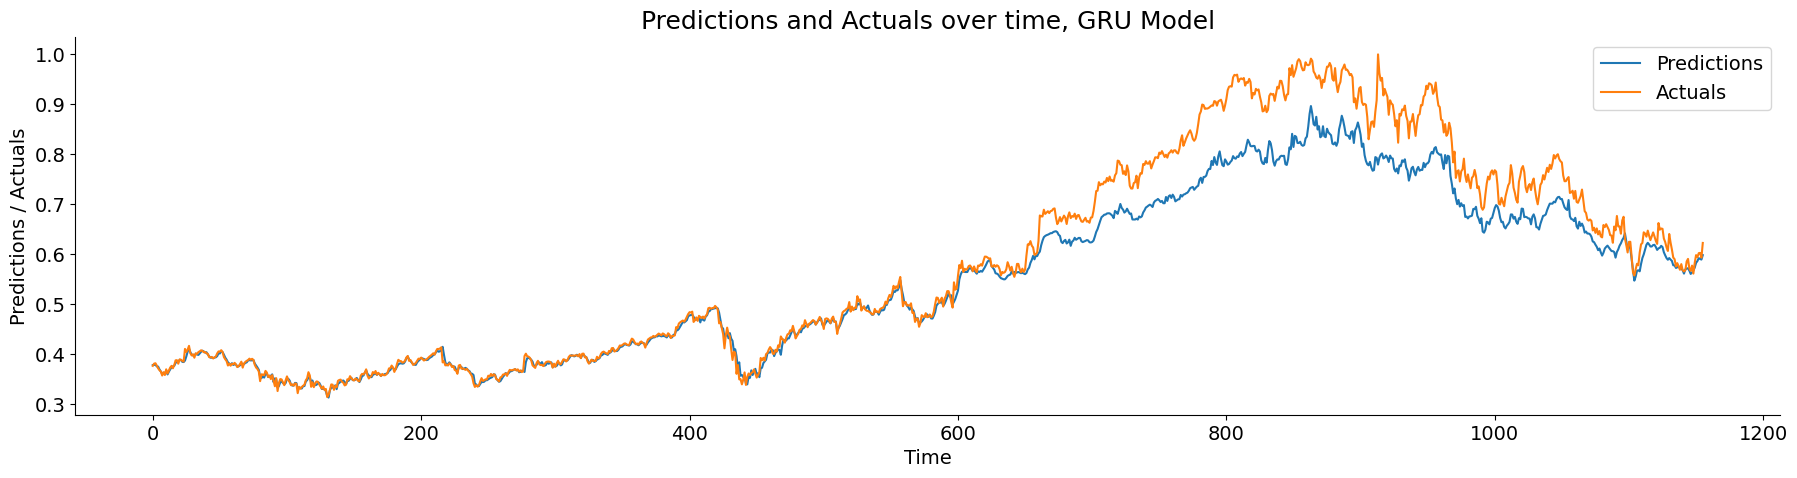

In [96]:
# plot predictions
plt.plot(test_results['Test Predictions']) 
# plot actual values
plt.plot(test_results['Actuals'])
#removing top spine
plt.gca().spines['top'].set_visible(False)
#removing right spine
plt.gca().spines['right'].set_visible(False)
#adding legend to the chart
plt.legend(['Predictions', 'Actuals'])
#setting y-axis label
plt.ylabel('Predictions / Actuals')
#setting x-axis label
plt.xlabel('Time')
#giving the chart title
plt.title('Predictions and Actuals over time, GRU Model', fontsize=18)
#displaying the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Performance Evaluation
    
</h2>
</div>
    
</center>

- Model evaluation is important because it helps to ensure that a machine learning model is working properly and is suitable for its intended purpose. 

- It also helps to identify potential issues with the model, such as overfitting, underfitting, bias, and variance. 

- By performing model evaluation, data scientists can make sure that the model is optimized to best represent the data and is giving accurate predictions. 

- Ultimately, model evaluation helps to improve the accuracy, reliability, and performance of the machine learning model.

In [97]:
print('MSE of the GRU model :', round(mse(test_results['Test Predictions'], test_results['Actuals']),6))

MSE of the GRU model : 0.003459


## Further Reading
1. Predict Stock Prices With Python and Scikit-Learn: Machine Learning Project -  http://bit.ly/3H5inOq
2. Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras - https://bit.ly/3H3uknQ
3. Learn by example RNN/LSTM/GRU time series -  http://bit.ly/3D75H8A
4. Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs - http://bit.ly/3ZUuuql

<p>

THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK. IF YOU LIKED THE WALKTHROUGH, I WOULD APPRECIATE IF YOU COULD LEAVE AN UPVOTE AND FOLLOW ME FOR MORE!!

</p>